<h1 style="text-align: center;">Projeto - Classificação de Pacientes com Diabetes</h1>

Autor: [Matheus Araujo](https://www.linkedin.com/in/matheus-p-araujo/)

![materia](./data/materia.png)

## Introdução

O diabetes atinge 10,2% da população brasileira, conforme dados da pesquisa Vigitel Brasil 2023 (Vigilância de Fatores de Risco e Proteção para Doenças Crônicas por Inquérito Telefônico). De acordo com o Atlas da Diabetes da Federação Internacional de Diabetes (IDF), sete em cada dez pessoas com diabetes só descobrem que têm a doença após o desenvolvimento de complicações, como dificuldade de cicatrização. Diante desse problema, é fundamental obter o diagnóstico o quanto antes para adotar mudanças no estilo de vida e, assim, evitar uma série de complicações que podem afetar os olhos, rins, circulação sanguínea e até o sistema nervoso.

Fontes:

https://g1.globo.com/saude/noticia/2023/12/17/diabetes-7-em-cada-10-pacientes-so-descobrem-a-doenca-apos-terem-complicacoes-veja-sintomas.ghtml
https://www.camara.leg.br/noticias/1014637-brasil-ocupa-segundo-lugar-em-numero-de-mortes-por-diabetes-nao-diagnosticado-afirmam-especialistas/
https://agenciabrasil.ebc.com.br/saude/noticia/2023-11/mais-de-10-dos-brasileiros-vivem-com-diabetes

## Objetivos

O objetivo deste modelo de machine learning é, a partir de algumas informações dos pacientes, classificar se eles são ou não diabéticos, baseando-se em uma série de dados de saúde e estilo de vida. Para o desenvolvimento deste projeto, utilizaremos a base de dados [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data?select=diabetes_012_health_indicators_BRFSS2015.csv), que contém 253.680 respostas a uma pesquisa conduzida em 2015 pelo CDC (Centers for Disease Control and Prevention) dos Estados Unidos. O objetivo dessa pesquisa foi coletar informações sobre indicadores de saúde relacionados ao diabetes. A base de dados faz parte do Behavioral Risk Factor Surveillance System (BRFSS), um sistema de vigilância de fatores de risco à saúde.

Link para acessar a base de dados: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data?select=diabetes_012_health_indicators_BRFSS2015.csv

### Dicionário de dados

Os dados estão dispostos em uma tabela com uma linha para cada paciente, e uma coluna para cada variável armazenando as características desses indivíduos. Abaixo está o dicionário de dados com a explicação das variáveis no arquivo **diabetes_binary_health_indicators_BRFSS2015.csv**:

| Variável                | Descrição                                                                               | Tipo             |
| ----------------------- |:---------------------------------------------------------------------------------------:| ----------------:|
| Diabetes_binary         |  Indica se o paciente tem ou não diabetes (0 = Não, 1 = Sim)                             | ponto flutuante  |
| HighBP                  |  Indica se o paciente foi diagnosticado com pressão alta (0 = Não, 1 = Sim)              | ponto flutuante  |
| HighChol                |  Indica se o paciente foi diagnosticado com colesterol alto (0 = Não, 1 = Sim)           | ponto flutuante  |
| CholCheck               |  Indica se o paciente fez um exame de colesterol nos últimos 5 anos (0 = Não, 1 = Sim)   | ponto flutuante  |
| BMI                     |  Índice de Massa Corporal (IMC) do paciente                                              | ponto flutuante  |
| Smoker                  |  Indica se o paciente fuma atualmente (0 = Não, 1 = Sim)                                 | ponto flutuante  |
| Stroke                  |  Indica se o paciente já teve um derrame (0 = Não, 1 = Sim)                              | ponto flutuante  |
| HeartDiseaseorAttack     |  Indica se o paciente já teve doença cardíaca ou ataque cardíaco (0 = Não, 1 = Sim)      | ponto flutuante  |
| PhysActivity            |  Indica se o paciente fez atividade física nos últimos 30 dias (0 = Não, 1 = Sim)        | ponto flutuante  |
| Fruits                  |  Indica se o paciente consome frutas diariamente (0 = Não, 1 = Sim)                      | ponto flutuante  |
| Veggies                 |  Indica se o paciente consome vegetais diariamente (0 = Não, 1 = Sim)                    | ponto flutuante  |
| HvyAlcoholConsump       |  Consumo excessivo de álcool (0 = Não, 1 = Sim)                                          | ponto flutuante  |
| AnyHealthcare           |  Indica se o paciente tem acesso a serviços de saúde (0 = Não, 1 = Sim)                  | ponto flutuante  |
| NoDocbcCost             |  Indica se o paciente não consultou um médico por questões financeiras (0 = Não, 1 = Sim) | ponto flutuante  |
| GenHlth                 |  Autoavaliação da saúde geral (1 = Excelente, 5 = Ruim)                                  | ponto flutuante  |
| MentHlth                |  Número de dias nos últimos 30 em que o paciente sentiu que sua saúde mental não estava boa | ponto flutuante  |
| PhysHlth                |  Número de dias nos últimos 30 em que o paciente sentiu que sua saúde física não estava boa | ponto flutuante  |
| DiffWalk                |  Indica se o paciente tem dificuldade para caminhar ou subir escadas (0 = Não, 1 = Sim)  | ponto flutuante  |
| Sex                     |  Sexo biológico (0 = Feminino, 1 = Masculino)                                            | ponto flutuante  |
| Age                     |  Faixa etária do paciente (1 = 18-24 anos, 13 = 80 anos ou mais)                         | ponto flutuante  |
| Education               |  Nível educacional (1 = Menor que ensino fundamental, 6 = Superior completo)             | ponto flutuante  |
| Income                  |  Faixa de renda anual (1 = Menos de US 10.000, 8 = Mais de US 75.000)                  | ponto flutuante  |


### Importação de bibliotecas

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
from lightgbm import LGBMClassifier

from ydata_profiling import ProfileReport
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
import joblib

from imblearn.over_sampling import SMOTE

from boruta import BorutaPy

from pycaret.classification import *

import warnings;   warnings.filterwarnings("ignore")

### Amostragem

In [2]:
# Carregar a base de dados
df_raw = pd.read_csv('./data/diabetes_binary_health_indicators_BRFSS2015.csv')
df = df_raw.copy()
print(f' A base possui {df.shape[0]} registros com {df.shape[1]} colunas.')
df.head()

 A base possui 253680 registros com 22 colunas.


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Todas as colunas estão com tipo ponto flutuante, o que vai nos economizar o processo de data wrangling e transformação de dados mais adiante.

In [4]:
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

A base também não possui dados faltantes.

In [5]:
df.duplicated().sum()

24206

A base possui 24.206 colunas duplicadas de acordo com o Python. Acredito que isso seja uma coincidência, já que diferentes pacientes podem compartilhar os mesmos valores em todas as variáveis. Isso pode ocorrer especialmente se os dados forem agregados ou limitados a indicadores de saúde gerais (como IMC) e não houver uma coluna de identificação única (ID). Por isso, não iremos remover as linhas que o Python identificou como duplicadas.

### Descritiva básica univariada


In [6]:
for coluna in df:
    print(df[coluna].value_counts())
    print(df[coluna].describe())
    print('\n')

Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64
count    253680.000000
mean          0.139333
std           0.346294
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Diabetes_binary, dtype: float64


HighBP
0.0    144851
1.0    108829
Name: count, dtype: int64
count    253680.000000
mean          0.429001
std           0.494934
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: HighBP, dtype: float64


HighChol
0.0    146089
1.0    107591
Name: count, dtype: int64
count    253680.000000
mean          0.424121
std           0.494210
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: HighChol, dtype: float64


CholCheck
1.0    244210
0.0      9470
Name: count, dtype: int64
count    253680.000000
mean          0.962670
std           0.189571
min           0.0

In [7]:
print('Nossa variável resposta está dividida da seguinte maneira: ')
print(f'Dos {df.shape[0]} pacientes registrados na base, {df.Diabetes_binary.value_counts()[1]} são diabéticos, o que corresponde a {df.Diabetes_binary.value_counts()[1]/df.shape[0]*100:.2f}% de toda base.')

Nossa variável resposta está dividida da seguinte maneira: 
Dos 253680 pacientes registrados na base, 35346 são diabéticos, o que corresponde a 13.93% de toda base.


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


Notamos que nas variáveis  ``Age``, ``Education`` e ``Income`` estão formato de faixas categorizadas, então iremos utilizar a função ``pd.cut()`` para  mapeá-las manualmente para os valores de rótulo (faixas), conforme está na documentação da [base no Kaggle](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

In [9]:
age_map = {
    1.0: '18-24', 2.0: '25-29', 3.0: '30-34', 4.0: '35-39', 
    5.0: '40-44', 6.0: '45-49', 7.0: '50-54', 8.0: '55-59', 
    9.0: '60-64', 10.0: '65-69', 11.0: '70-74', 12.0: '75-79', 13.0: '80+'
}

education_map = {
    1.0: 'Never attended school/kindergarten', 
    2.0: 'Elementary incomplete', 
    3.0: 'Elementary complete', 
    4.0: 'Some high school', 
    5.0: 'High school graduate', 
    6.0: 'College'
}

income_map = {
    1.0: '<10k', 2.0: '10-15k', 3.0: '15-20k', 4.0: '20-25k', 
    5.0: '25-35k', 6.0: '35-50k', 7.0: '50-75k', 8.0: '>75k'
}

df['Age_mapped'] = df['Age'].map(age_map)
df['Education_mapped'] = df['Education'].map(education_map)
df['Income_mapped'] = df['Income'].map(income_map)

df['Age'] = df['Age'].map(age_map)
df['Education'] = df['Education'].map(education_map)
df['Income'] = df['Income'].map(income_map)
df.drop(columns=['Age_mapped', 'Education_mapped', 'Income_mapped'], inplace = True)
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,60-64,Some high school,15-20k
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,50-54,College,<10k
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,60-64,Some high school,>75k
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,70-74,Elementary complete,35-50k
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,70-74,High school graduate,20-25k


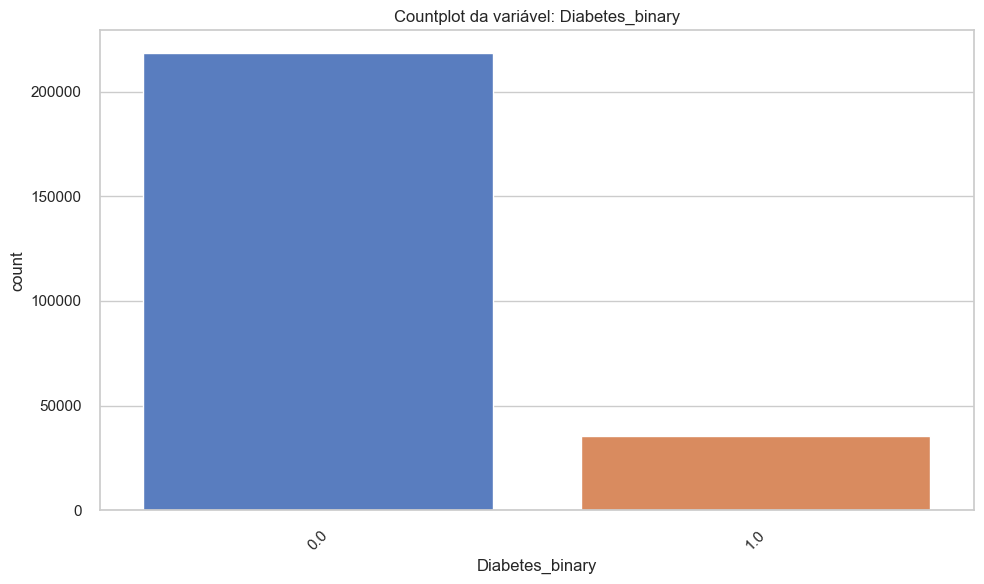

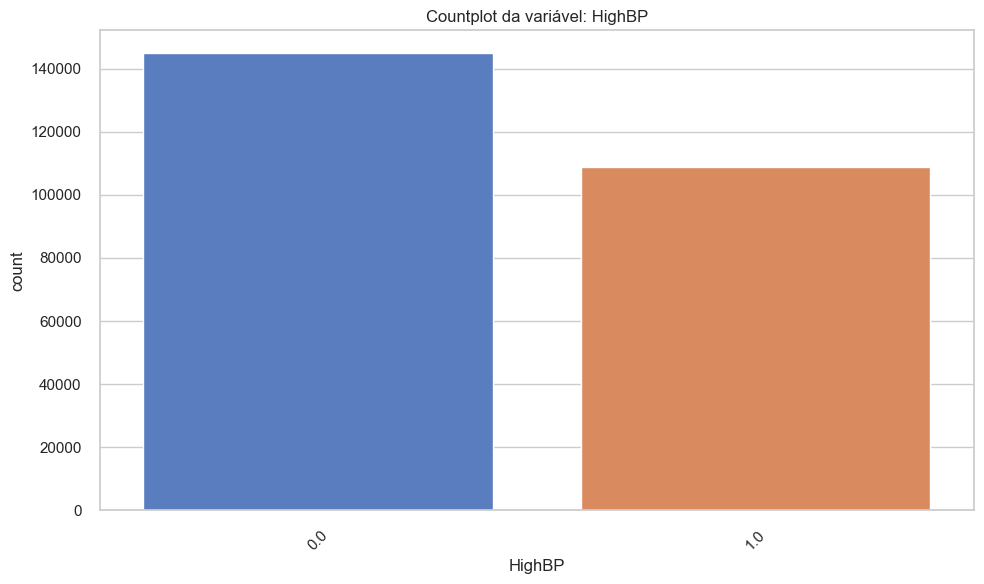

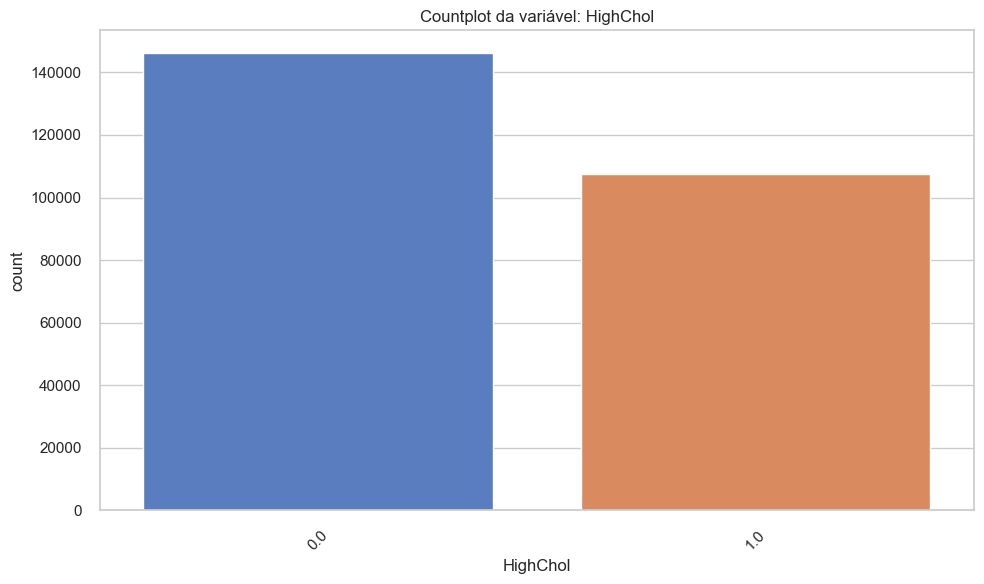

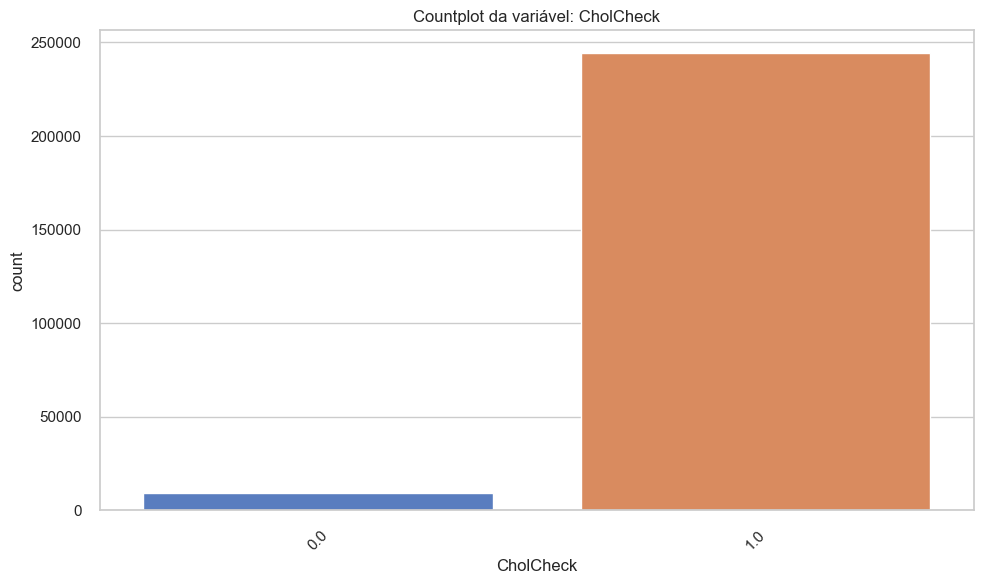

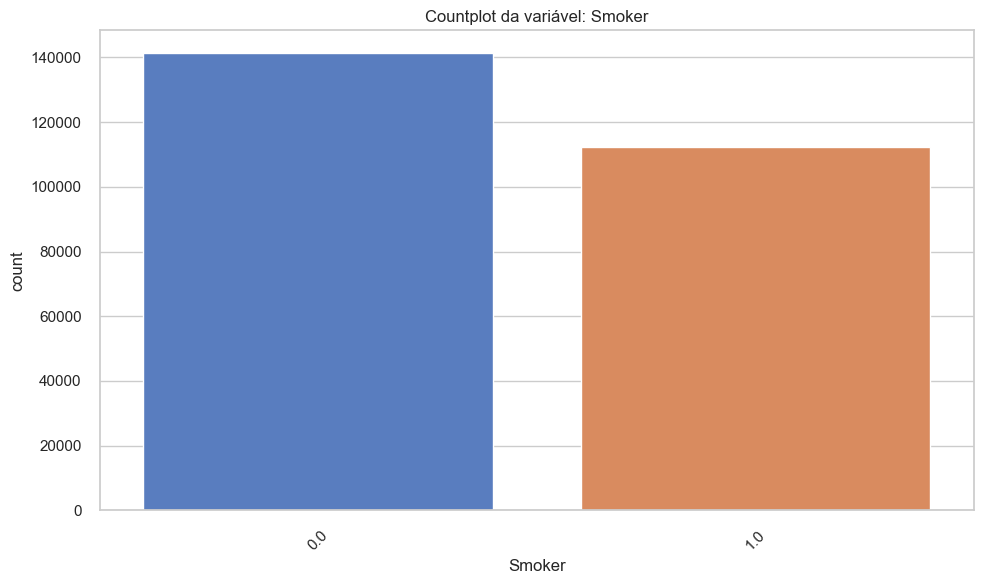

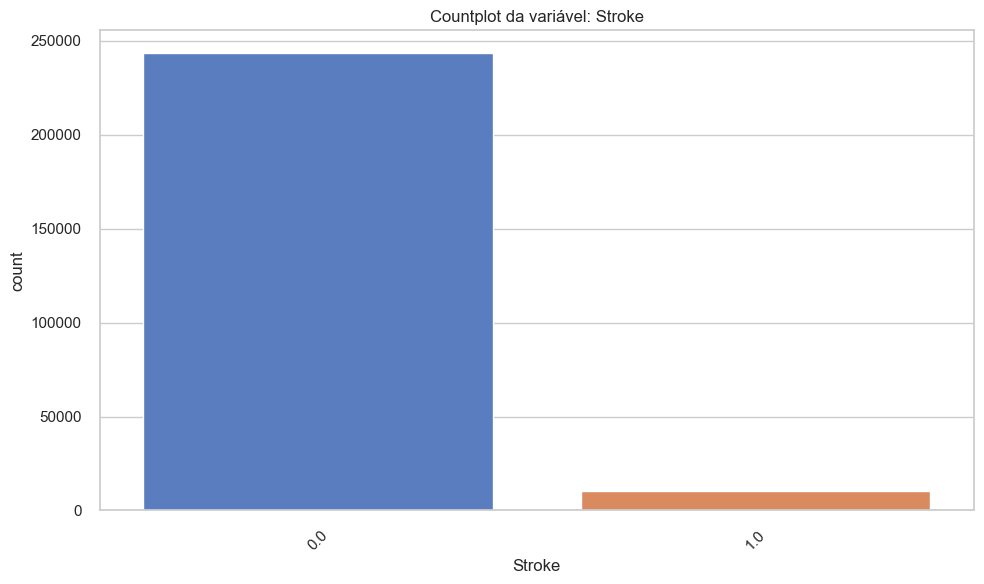

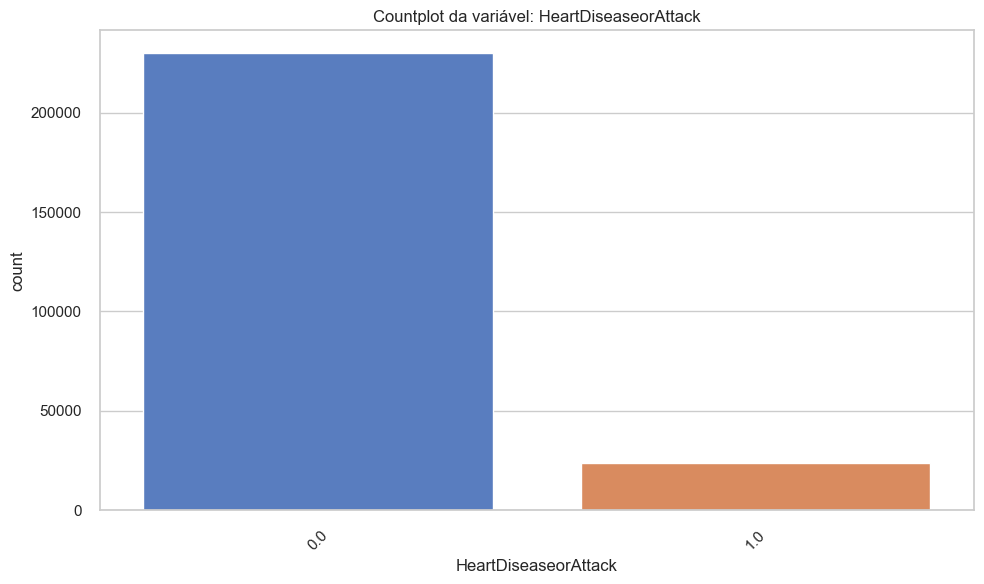

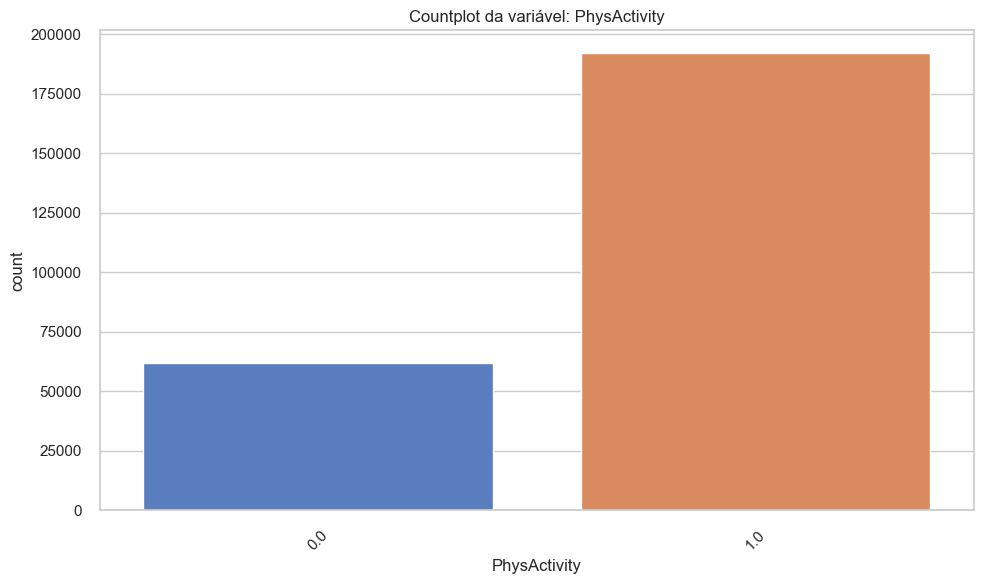

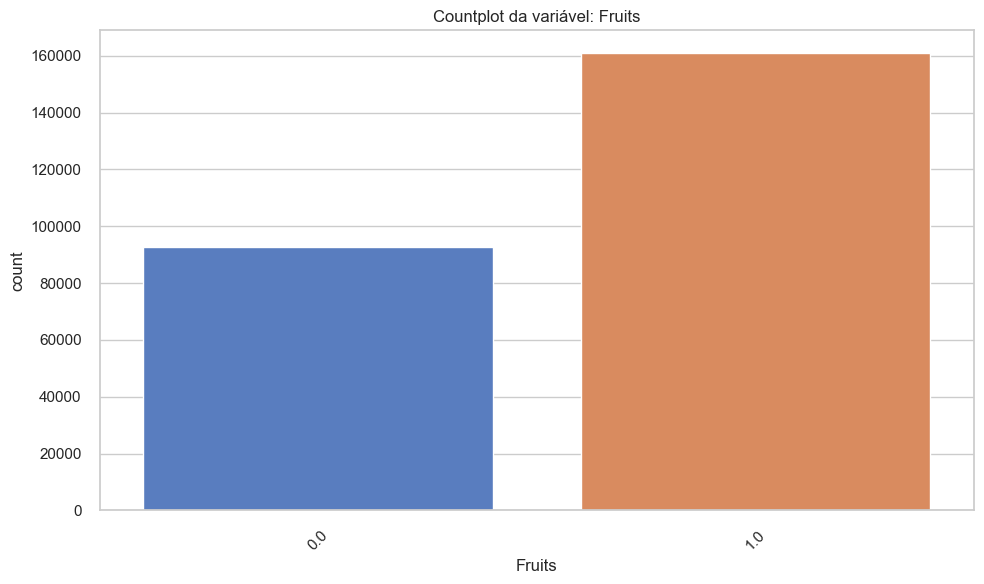

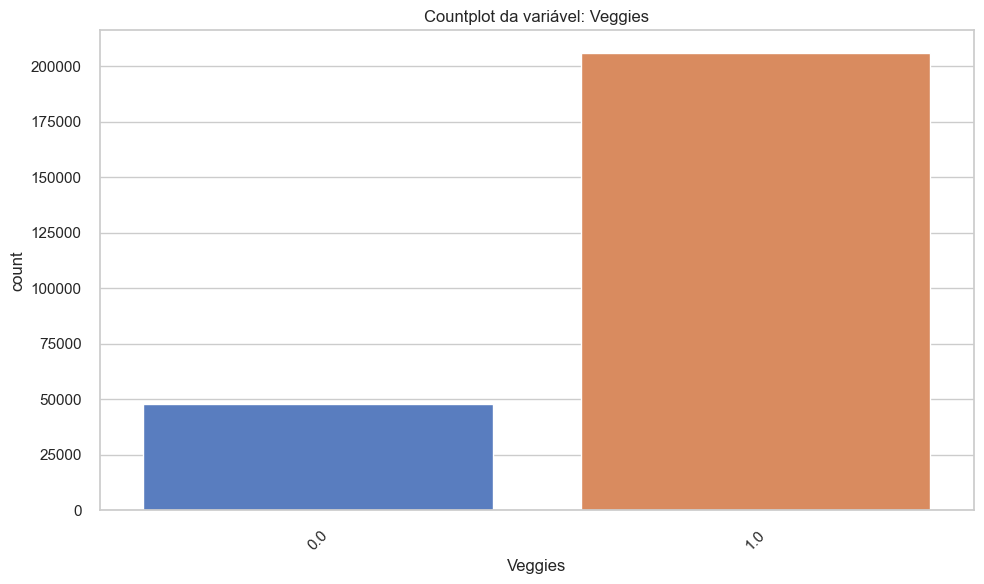

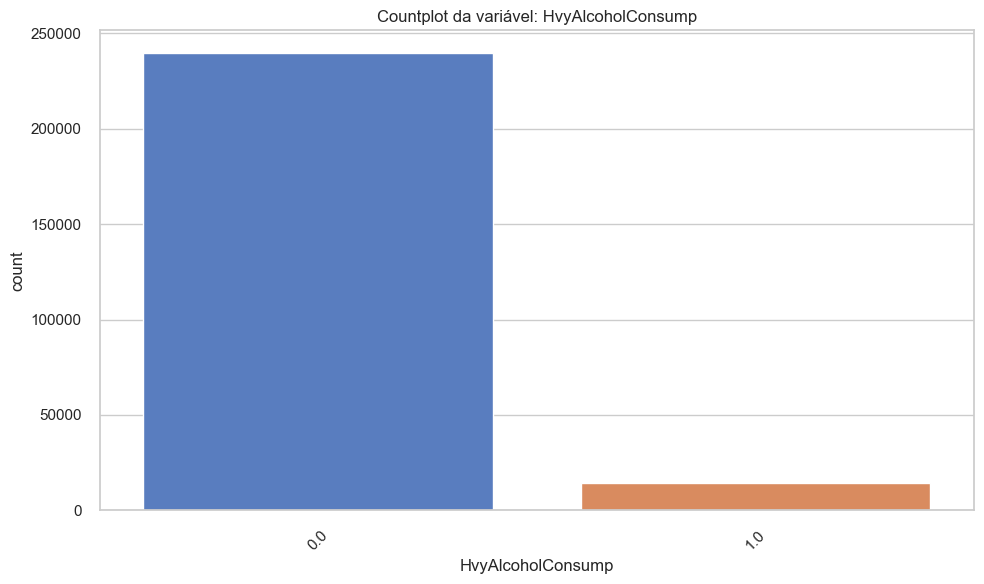

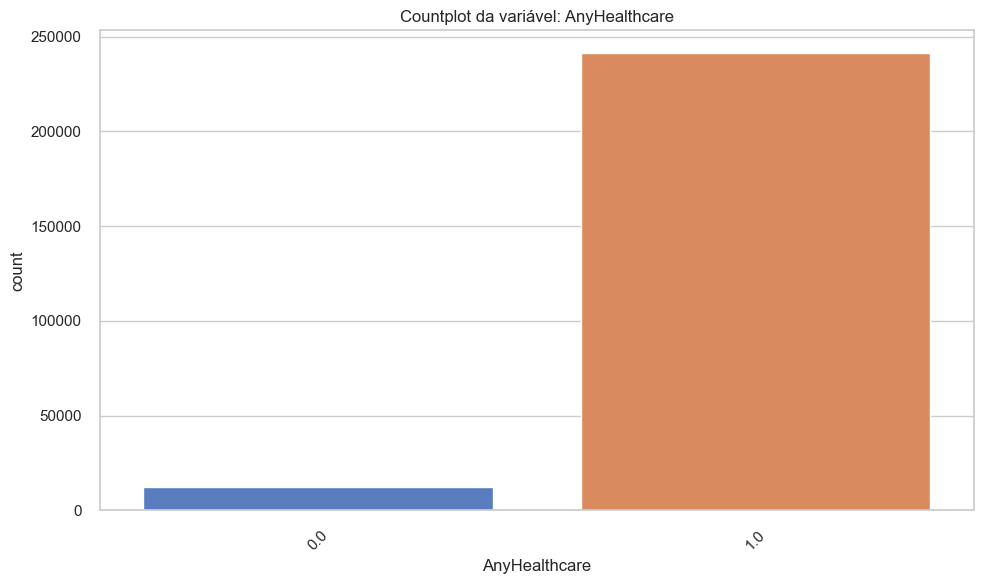

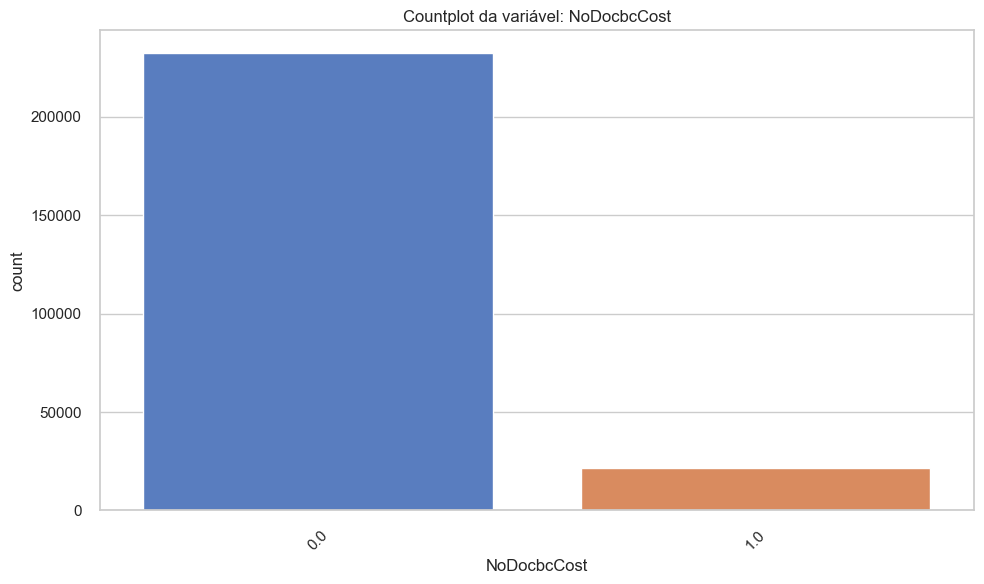

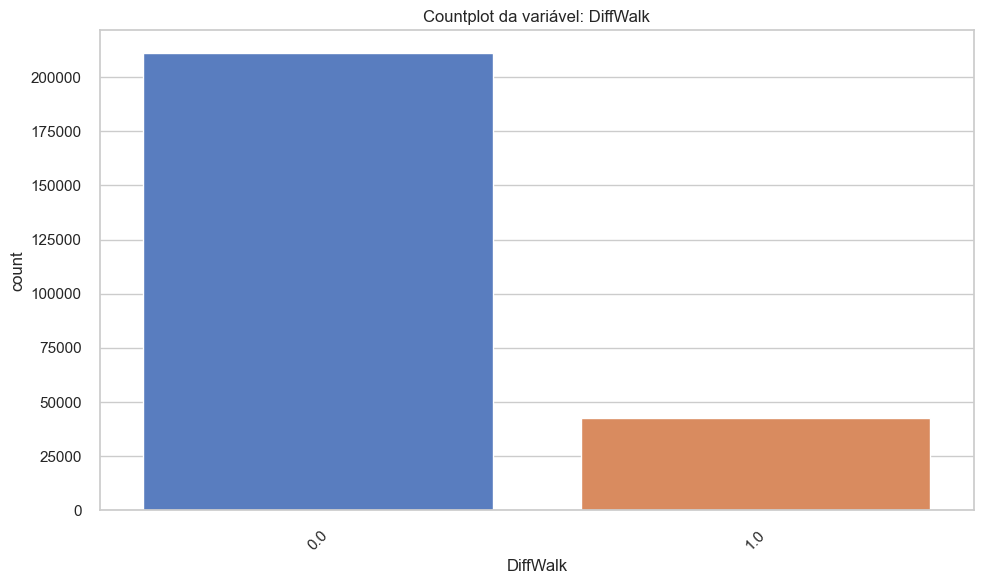

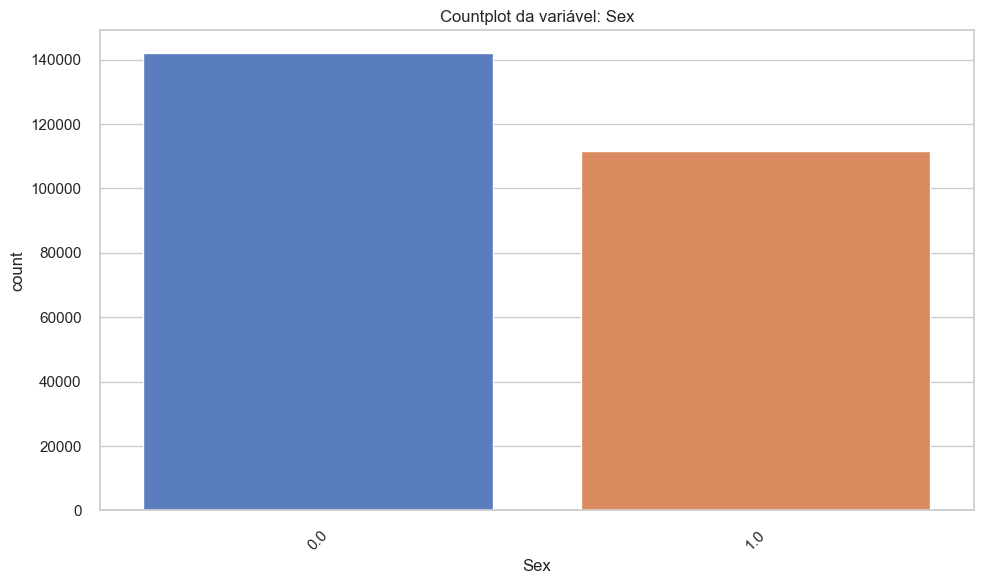

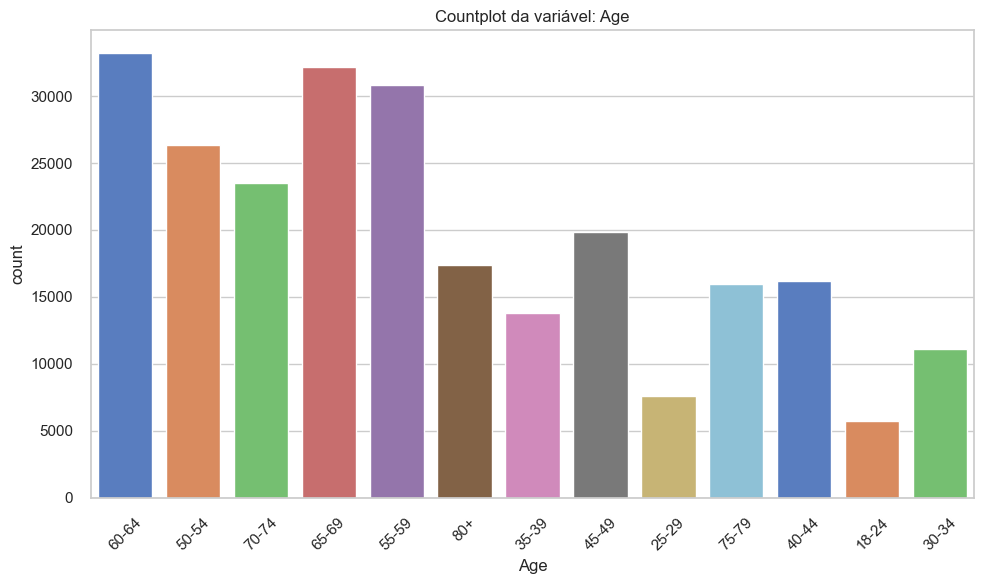

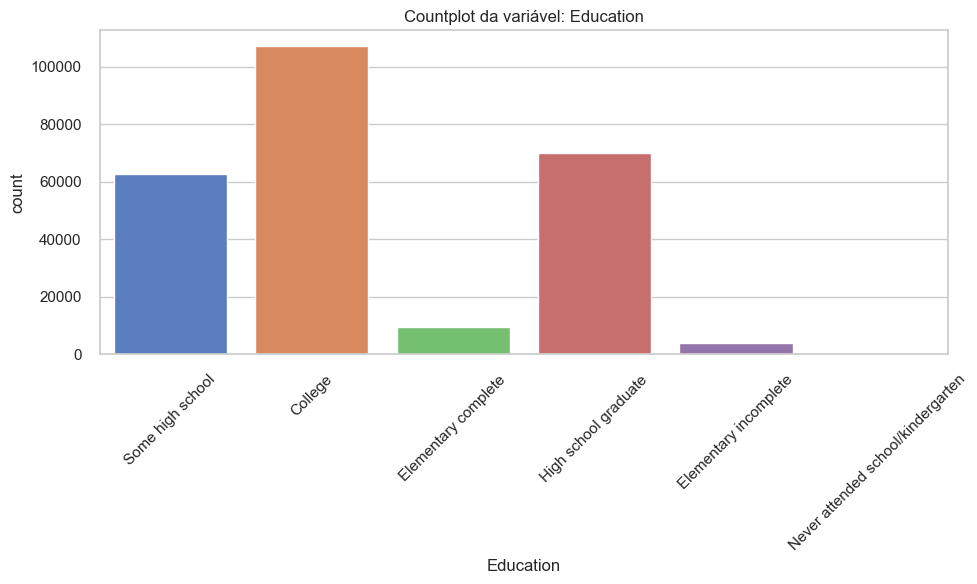

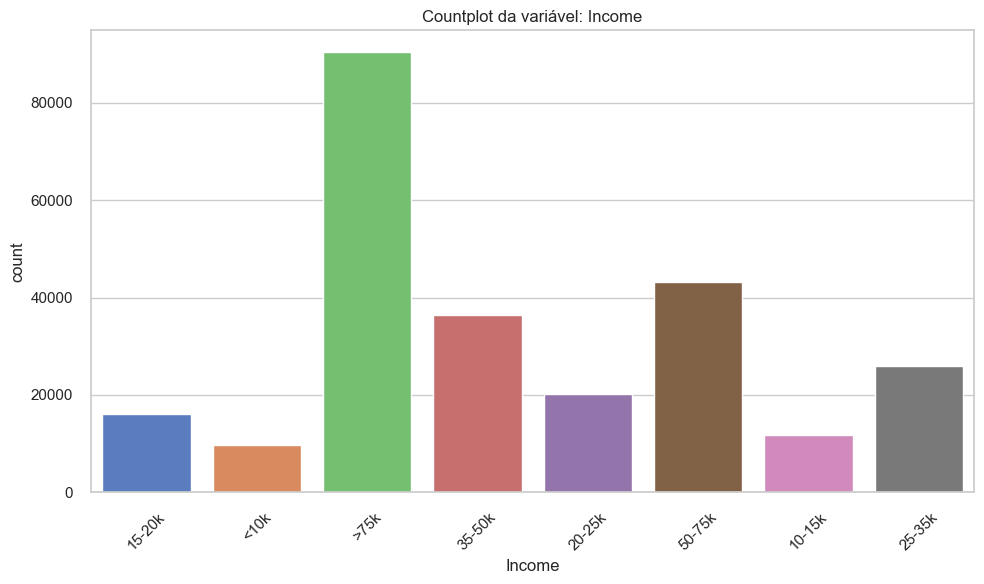

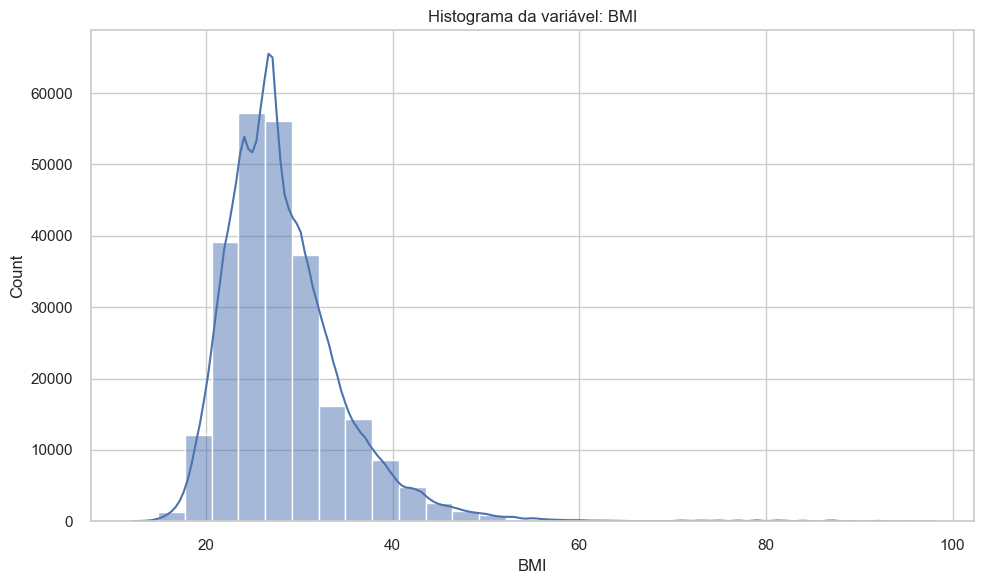

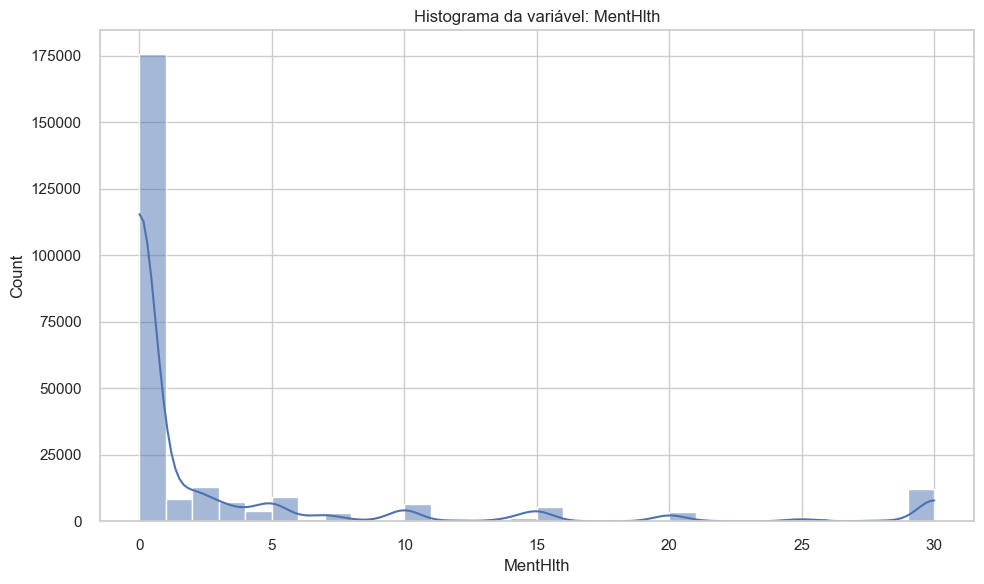

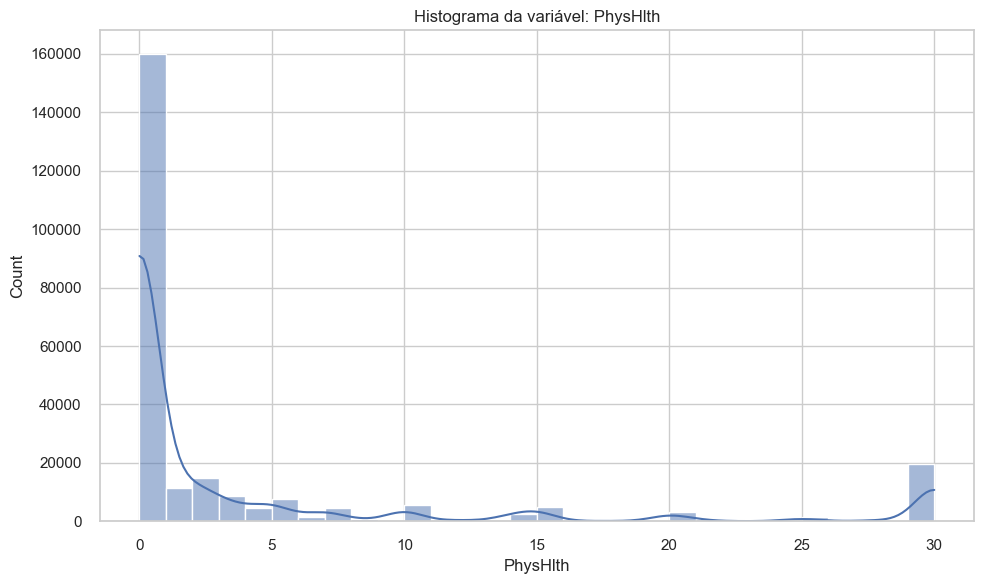

In [10]:
# Cria uma pasta chamada outputs para armazenar as saidas
if not os.path.exists('outputs'):
    os.makedirs('outputs')

sns.set(style="whitegrid")

variaveis_categoricas = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
                         'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 
                         'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 
                         'Sex', 'Age', 'Education', 'Income']

for variavel in variaveis_categoricas:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=variavel, data=df, palette='muted')
    plt.title(f'Countplot da variável: {variavel}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'outputs/countplot_{variavel}.png')
    plt.show()

variaveis_continuas = ['BMI', 'MentHlth', 'PhysHlth']

for variavel in variaveis_continuas:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[variavel], bins=30, kde=True)
    plt.title(f'Histograma da variável: {variavel}')
    plt.tight_layout()
    plt.savefig(f'outputs/histograma_{variavel}.png')
    plt.show()

In [11]:
prof_df = ProfileReport(df, explorative=True, minimal=True)
prof_df.to_file('./outputs/df_analisys.html')
prof_df

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Descritiva bivariada

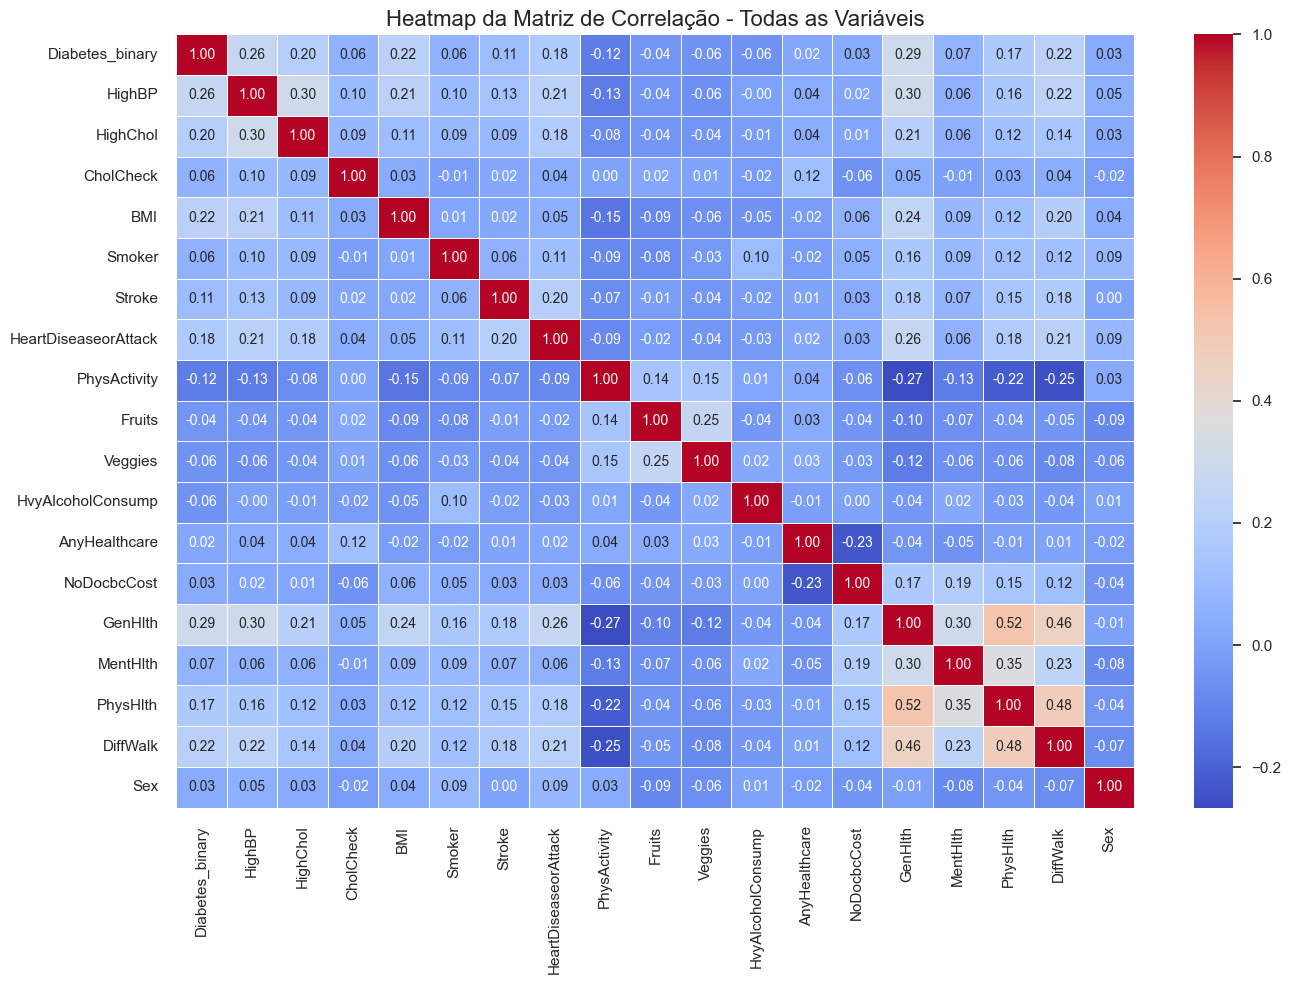

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex
Diabetes_binary,1.000000,0.263129,0.200276,0.064761,0.216843,0.060789,0.105816,0.177282,-0.118133,-0.040779,-0.056584,-0.057056,0.016255,0.031433,0.293569,0.069315,0.171337,0.218344,0.031430
HighBP,0.263129,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,-0.061266,-0.003972,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207
HighChol,0.200276,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,-0.039874,-0.011543,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205
CholCheck,0.064761,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,0.006121,-0.023730,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115
BMI,0.216843,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,-0.062275,-0.048736,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950
Smoker,0.060789,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,-0.030678,0.101619,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662
Stroke,0.105816,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,-0.041124,-0.016950,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978
HeartDiseaseorAttack,0.177282,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,-0.039167,-0.028991,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096
PhysActivity,-0.118133,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,0.153150,0.012392,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482
Fruits,-0.040779,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,0.254342,-0.035288,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175


In [12]:
# Correlação com as variaveis qualitativas
plt.figure(figsize=(14, 10))
df_num = df.select_dtypes(include=['float64', 'int64'])
correlacao = df_num.corr()
sns.heatmap(correlacao, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", annot_kws={"size": 10})

plt.title("Heatmap da Matriz de Correlação - Todas as Variáveis", size=16)
plt.tight_layout()
plt.savefig(f'outputs/Heatmap da Matriz de Correlação.png')
plt.show()

correlacao

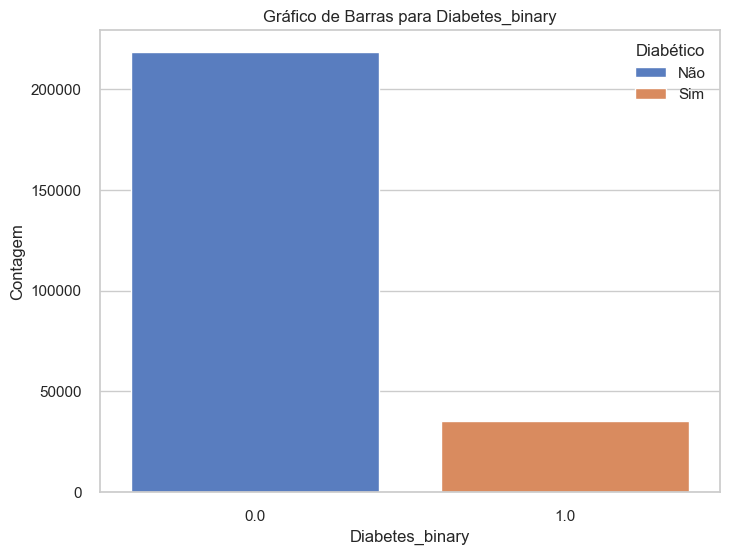

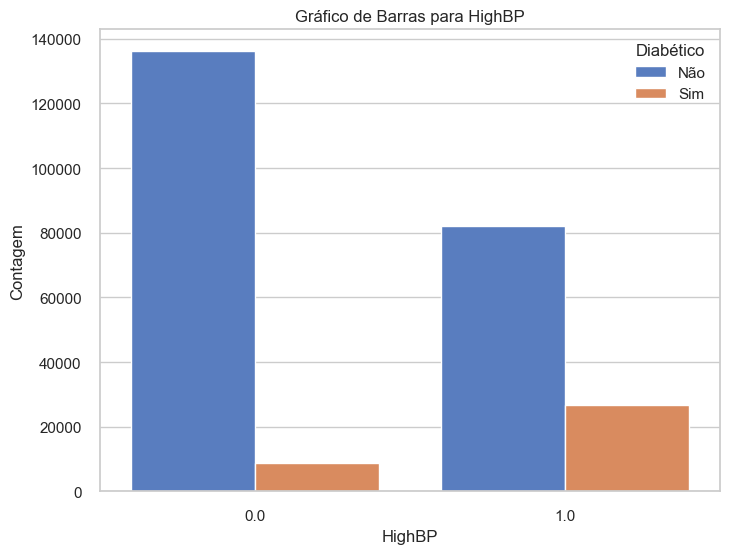

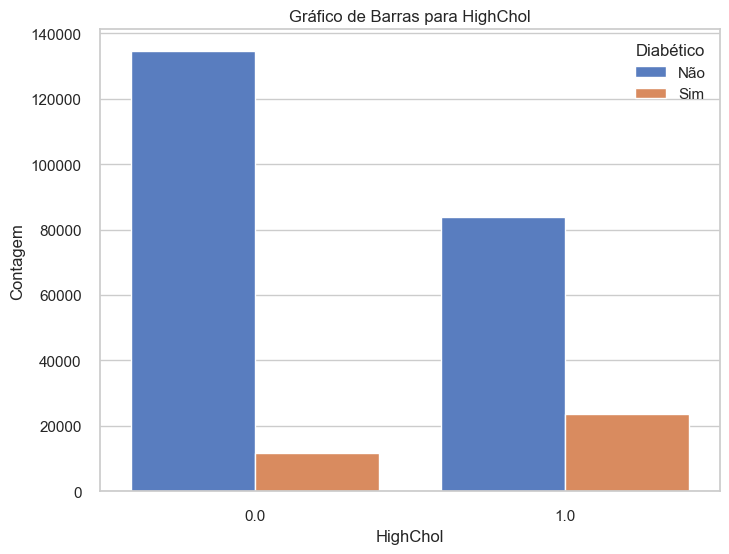

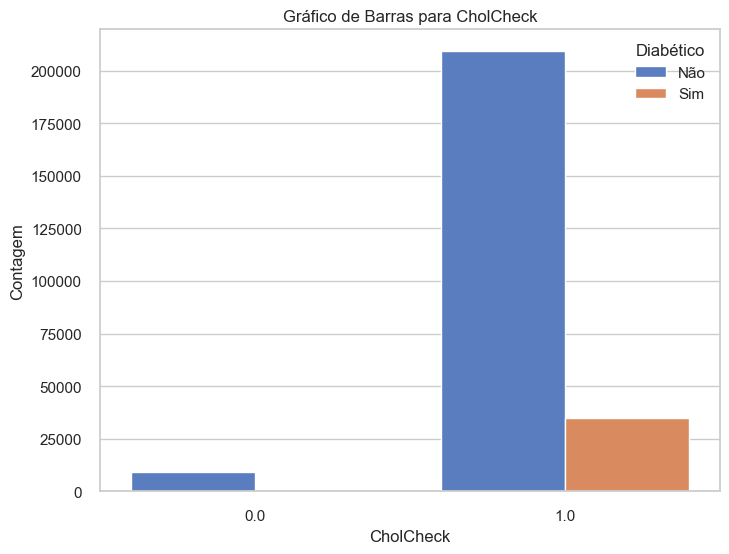

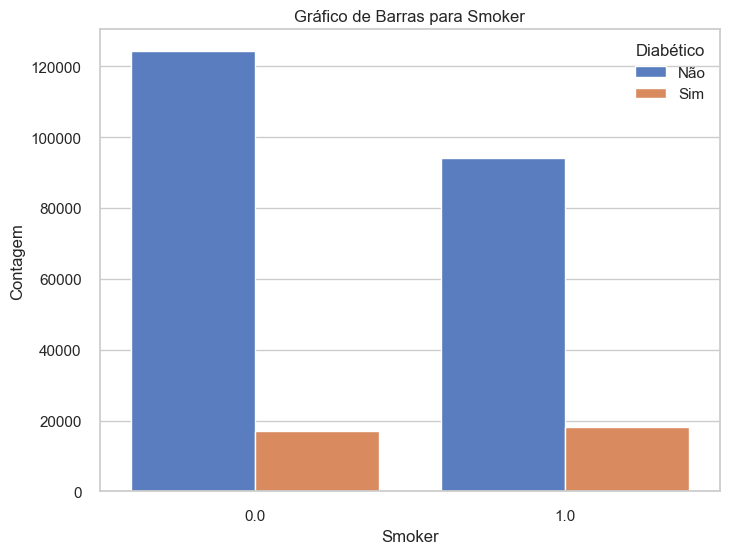

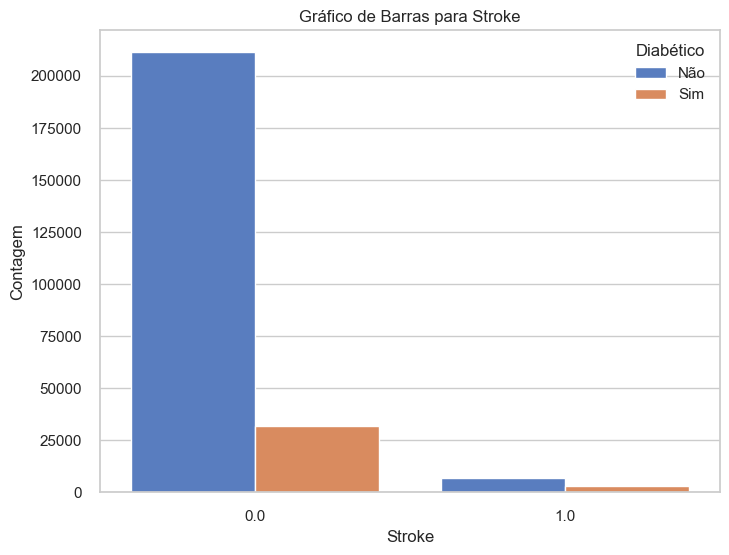

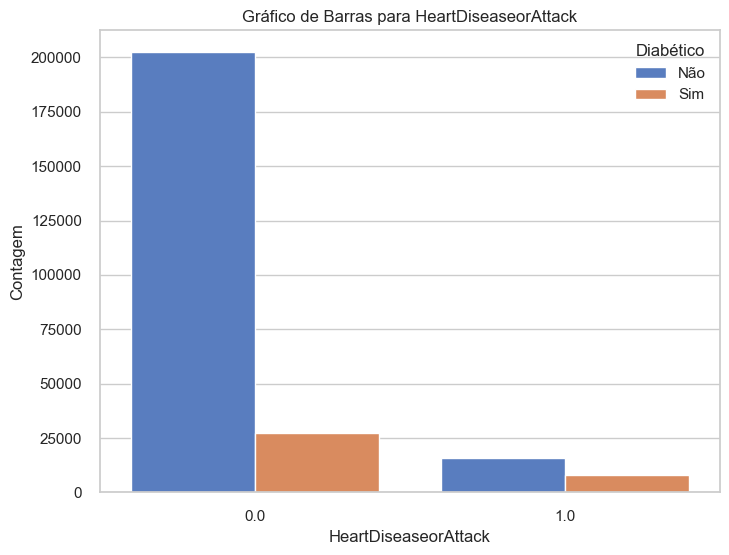

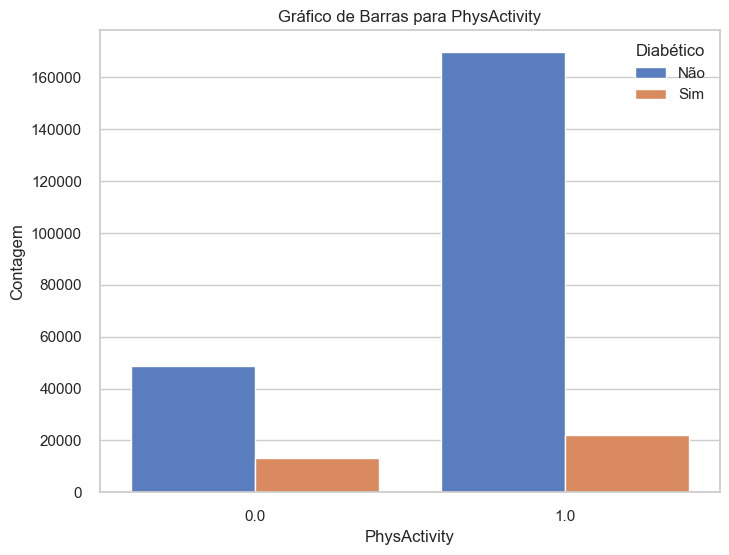

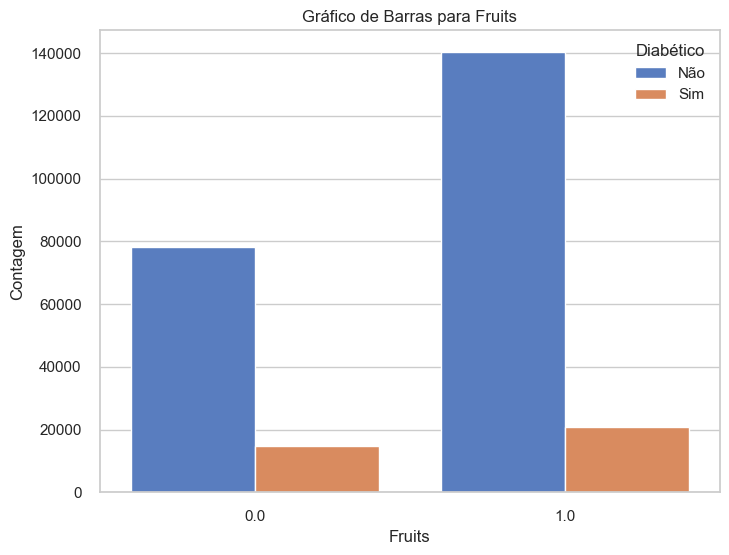

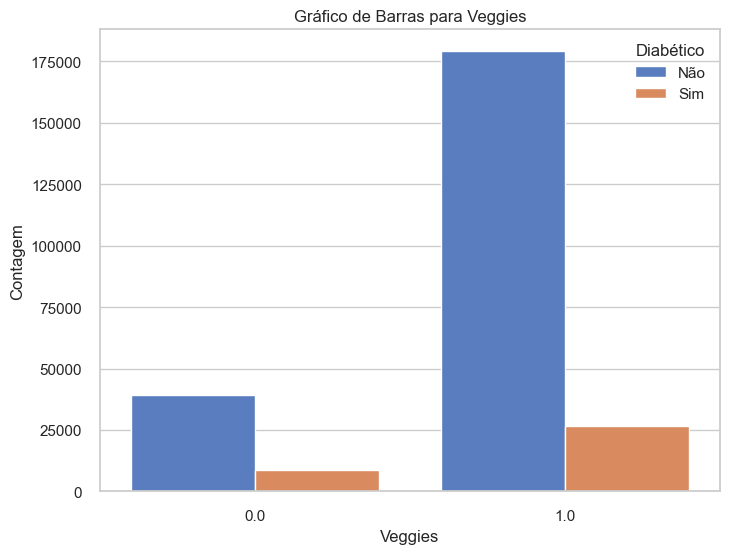

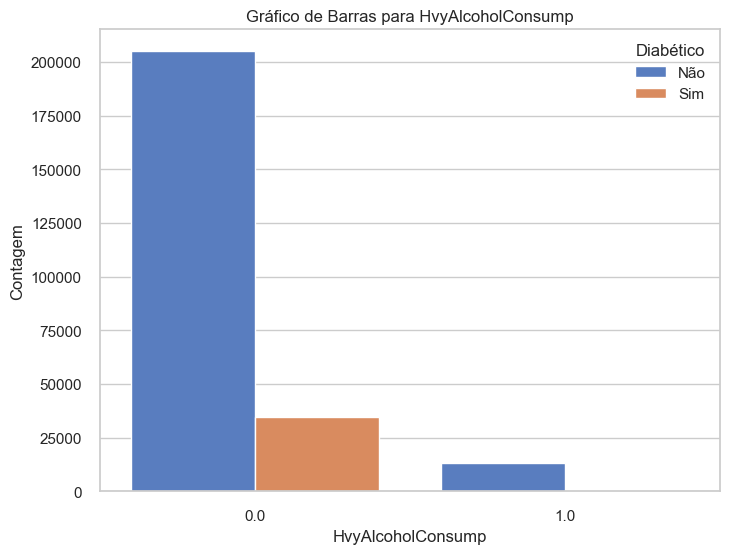

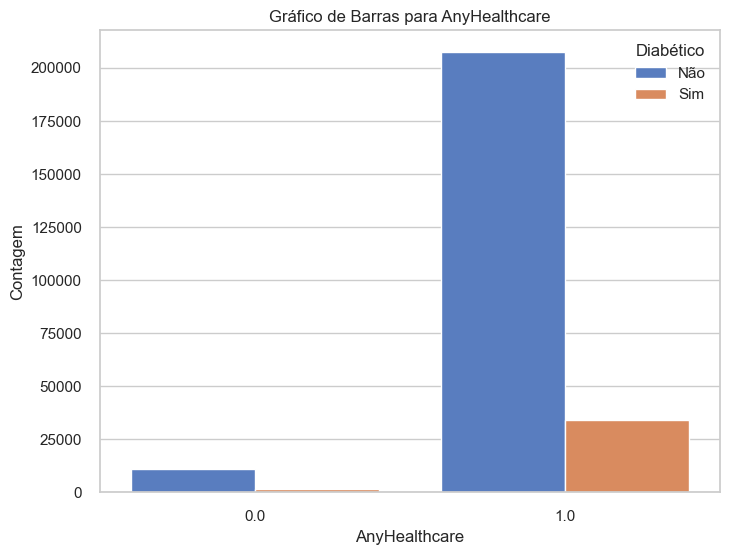

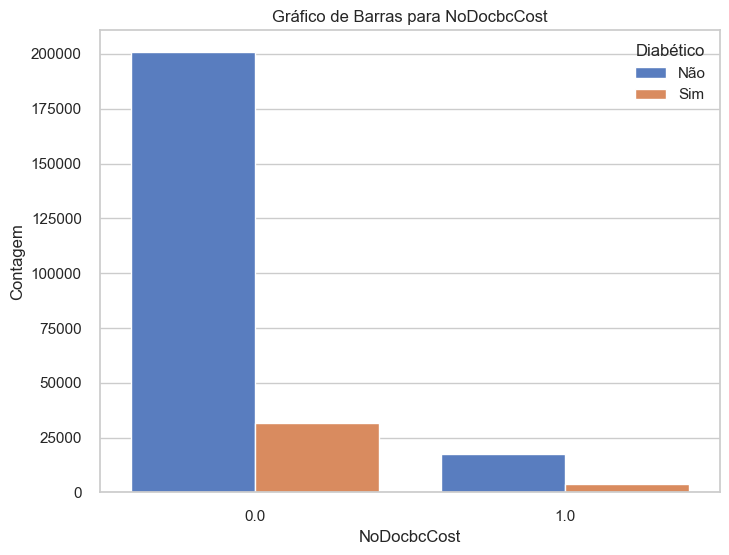

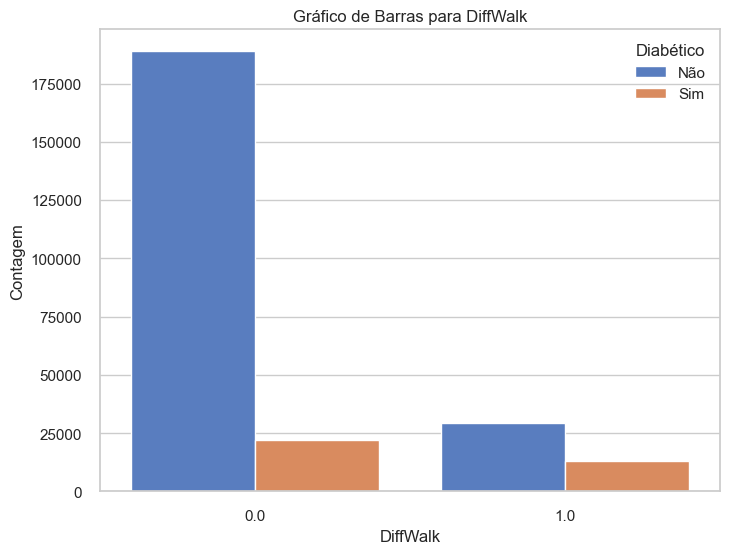

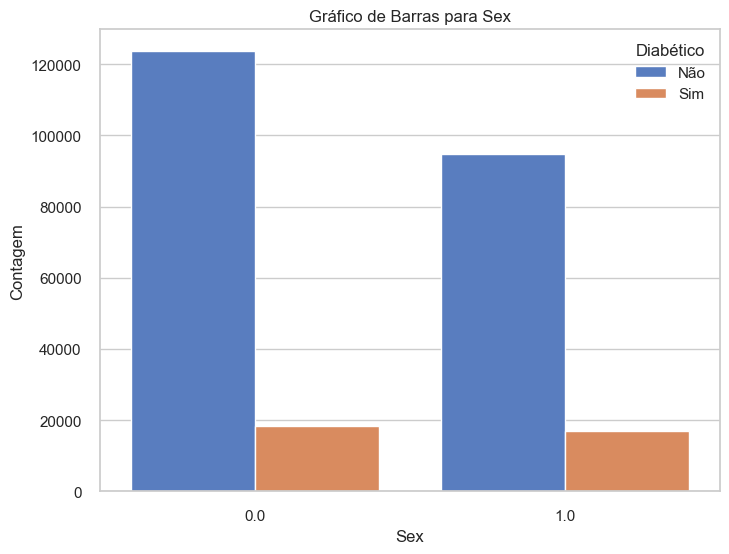

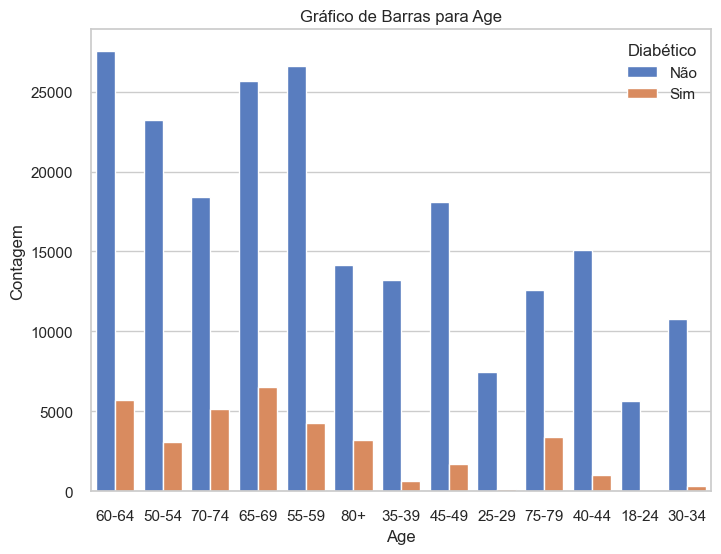

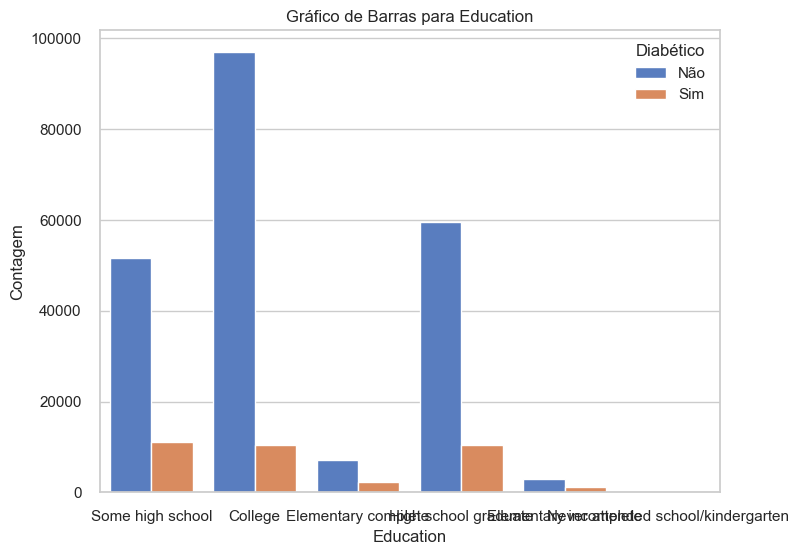

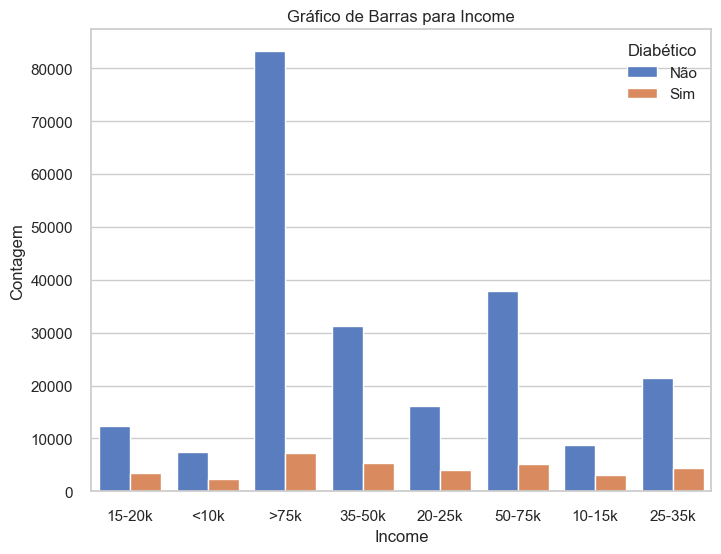

In [13]:
for variavel in variaveis_categoricas:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=variavel, hue='Diabetes_binary', data=df, palette='muted')
    plt.xlabel(variavel)
    plt.ylabel('Contagem')
    plt.title(f'Gráfico de Barras para {variavel}')
    plt.legend(title='Diabético', labels=['Não', 'Sim'])
    plt.savefig(f'outputs/countplot_{variavel}_bivariada.png')
    plt.show()

### Seleção de variáveis

Para utilizarmos as técnicas de seleção, é interessante que transformemos as variáveis de texto (object) em dummies (variáveis indicadoras).

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [15]:
df = pd.get_dummies(df, columns=['Age', 'Education', 'Income'], drop_first=True)
df = df.astype(float)
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Education_High school graduate,Education_Never attended school/kindergarten,Education_Some high school,Income_15-20k,Income_20-25k,Income_25-35k,Income_35-50k,Income_50-75k,Income_<10k,Income_>75k
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [16]:
metadados = pd.DataFrame(df.dtypes, columns=['dtype'])
metadados['nmissing'] = df.isna().sum()
metadados['papel'] = 'covariavel'
metadados.loc['Diabetes_binary','papel'] = 'resposta'
metadados['unicos'] = df.nunique()

In [17]:
# Função IV
def IV(variavel, resposta):
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')

    rótulo_evento = tab.columns[0]
    rótulo_nao_evento = tab.columns[1]

    tab['pct_evento'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    tab['pct_nao_evento'] = tab[rótulo_nao_evento]/tab.loc['total',rótulo_nao_evento]
    tab['woe'] = np.log(tab.pct_evento/tab.pct_nao_evento)
    tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.woe
    return tab['iv_parcial'].sum()

# Populando o metadados
for var in metadados[metadados.papel == 'covariavel'].index:
    if pd.api.types.is_numeric_dtype(df[var]):
        if metadados.loc[var, 'unicos'] > 50:
            metadados.loc[var, 'IV'] = IV(pd.qcut(df[var], 5, duplicates='drop'), df.Diabetes_binary)
        else:
            metadados.loc[var, 'IV'] = IV(df[var], df.Diabetes_binary)
    else:
        metadados.loc[var, 'IV'] = IV(df[var], df.Diabetes_binary)

In [18]:
metadados.loc[metadados['IV'] < 0.02, 'poder_preditivo'] = 'Irrelevante'
metadados.loc[(metadados['IV'] >= 0.02) & (metadados['IV'] <= 0.1), 'poder_preditivo'] = 'Fraco'
metadados.loc[(metadados['IV'] > 0.1) & (metadados['IV'] <= 0.3), 'poder_preditivo'] = 'Médio'
metadados.loc[(metadados['IV'] > 0.3) & (metadados['IV'] <= 0.5), 'poder_preditivo'] = 'Forte'
metadados.loc[metadados['IV'] > 0.5, 'poder_preditivo'] = 'Atenção, muito alto'
metadados

,dtype,nmissing,papel,unicos,IV,poder_preditivo
Diabetes_binary,float64,0,resposta,2,NaN,nan
HighBP,float64,0,covariavel,2,0.608078,"Atenção, muito alto"
HighChol,float64,0,covariavel,2,0.337290,Forte
CholCheck,float64,0,covariavel,2,0.065969,Fraco
BMI,float64,0,covariavel,84,0.438894,Forte
Smoker,float64,0,covariavel,2,0.030574,Fraco
Stroke,float64,0,covariavel,2,0.067521,Fraco
HeartDiseaseorAttack,float64,0,covariavel,2,0.192503,Médio
PhysActivity,float64,0,covariavel,2,0.104447,Médio
Fruits,float64,0,covariavel,2,0.013589,Irrelevante


**Boruta**

In [19]:
%%time
df1 = df.copy()
y = df1['Diabetes_binary']
df1 = df1.drop(['Diabetes_binary'], axis=1)


rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
boruta_selector = BorutaPy(rf, n_estimators='auto', random_state=42)
boruta_selector.fit(df1.values, y.values)

boruta_selecao = df1.columns[boruta_selector.support_].tolist()
print('Variáveis selecionadas pelo Boruta:')
print(boruta_selecao)

Variáveis selecionadas pelo Boruta:
['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age_25-29', 'Age_30-34', 'Age_35-39', 'Age_40-44', 'Age_45-49', 'Age_60-64', 'Age_65-69', 'Age_70-74', 'Age_75-79', 'Age_80+', 'Education_Elementary complete', 'Education_Elementary incomplete', 'Education_Some high school', 'Income_15-20k', 'Income_20-25k', 'Income_50-75k', 'Income_<10k', 'Income_>75k']
CPU times: total: 16min 5s
Wall time: 29min 38s


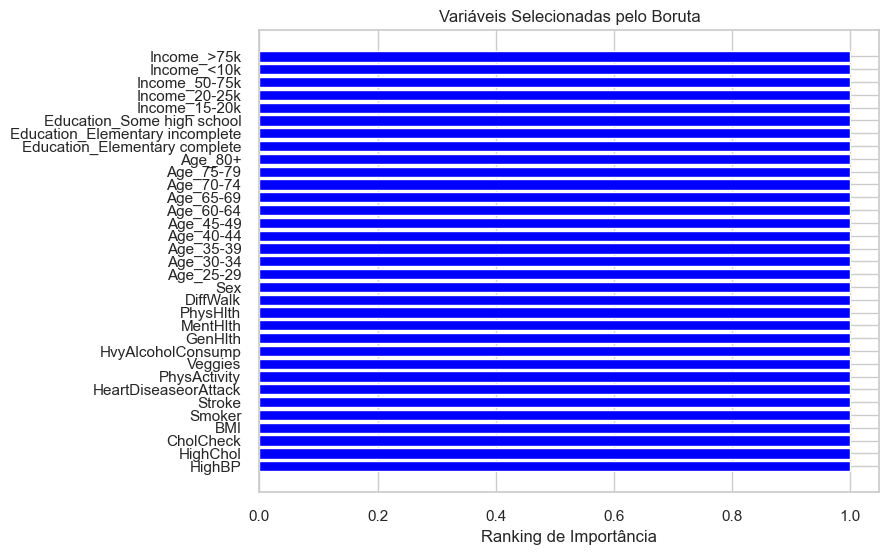

CPU times: total: 188 ms
Wall time: 806 ms


In [20]:
%%time
# Visualizar a importância das variáveis selecionadas pelo Boruta
variaveis_selecionadas_import = [boruta_selector.ranking_[df1.columns.get_loc(selecao)] for selecao in boruta_selecao]

plt.figure(figsize=(8, 6))
plt.barh(boruta_selecao, variaveis_selecionadas_import, color='blue')
plt.xlabel('Ranking de Importância')
plt.title('Variáveis Selecionadas pelo Boruta')
plt.savefig(f'outputs/variaveis_boruta.png')
plt.show()

**Feature Importance**

Ranking das variáveis:
1. BMI (0.1839)
2. PhysHlth (0.0833)
3. GenHlth (0.0716)
4. MentHlth (0.0616)
5. HighBP (0.0429)
6. Smoker (0.0367)
7. Fruits (0.0363)
8. Sex (0.0308)
9. Education_High school graduate (0.0293)
10. HighChol (0.0288)
11. Veggies (0.0280)
12. Education_Some high school (0.0273)
13. DiffWalk (0.0256)
14. PhysActivity (0.0255)
15. HeartDiseaseorAttack (0.0186)
16. Income_35-50k (0.0173)
17. Income_50-75k (0.0162)
18. Income_25-35k (0.0160)
19. NoDocbcCost (0.0152)
20. Income_20-25k (0.0143)
21. Age_60-64 (0.0142)
22. Income_>75k (0.0137)
23. Age_55-59 (0.0132)
24. Age_65-69 (0.0128)
25. Income_15-20k (0.0127)
26. Stroke (0.0120)
27. Age_70-74 (0.0119)
28. Age_50-54 (0.0111)
29. Age_75-79 (0.0109)
30. Age_80+ (0.0101)
31. Education_Elementary complete (0.0100)
32. Income_<10k (0.0091)
33. AnyHealthcare (0.0085)
34. Age_45-49 (0.0078)
35. HvyAlcoholConsump (0.0077)
36. Education_Elementary incomplete (0.0060)
37. Age_40-44 (0.0056)
38. Age_35-39 (0.0043)
39. CholCheck 

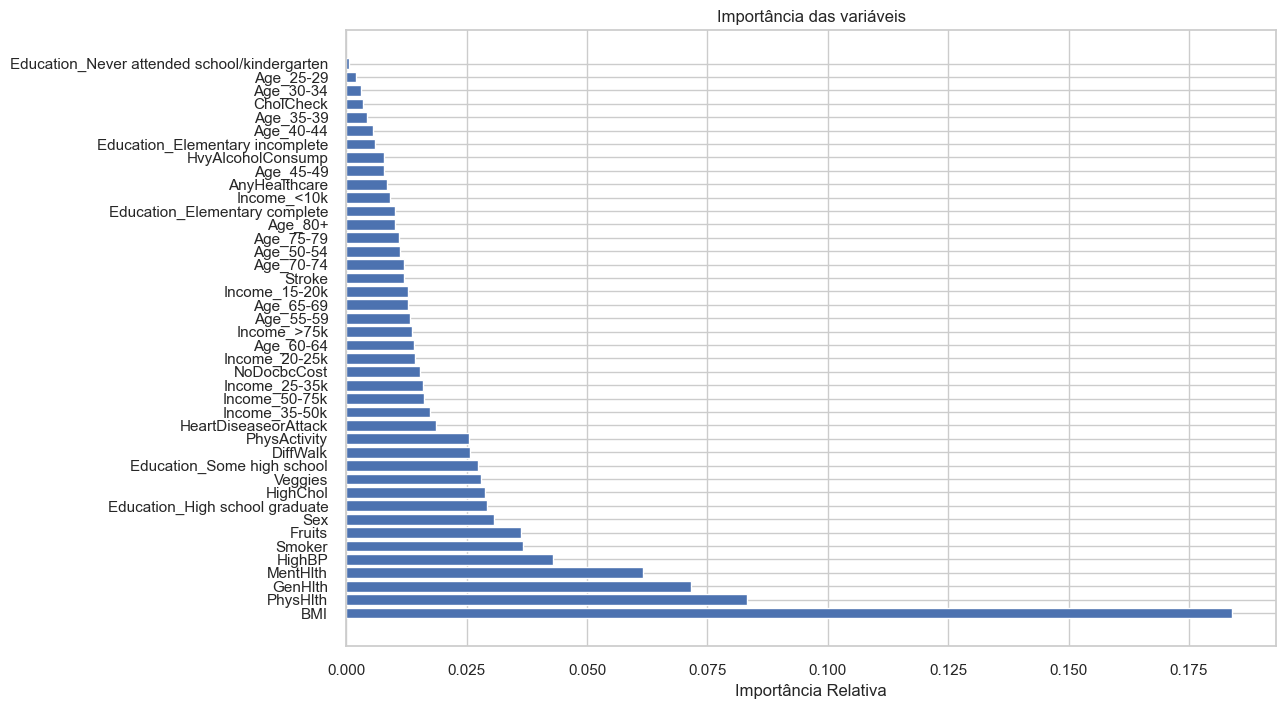

CPU times: total: 10.9 s
Wall time: 46.8 s


In [21]:
%%time
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(df1, y)

importancia = rf_model.feature_importances_

indices = importancia.argsort()[::-1]
variaveis_names = df1.columns

print("Ranking das variáveis:")
for i in range(df1.shape[1]):
    print(f"{i + 1}. {variaveis_names[indices[i]]} ({importancia[indices[i]]:.4f})")

plt.figure(figsize=(12, 8))
plt.title("Importância das variáveis")
plt.barh(range(df1.shape[1]), importancia[indices], align='center')
plt.yticks(range(df1.shape[1]), [variaveis_names[i] for i in indices])
plt.xlabel("Importância Relativa")
plt.savefig(f'outputs/features_importance.png')
plt.show()

De acordo com as técnicas Information Value (IV), Boruta e Feature Importance, obtivemos os seguintes insights:

- De acordo com IV, as variáveis ``HighChol``, ``BMI`` e``DiffWalk`` possuem poder preditivo forte, sendo os melhores para a análise, vale lembrar que as variaveis que possuem poder preditivo muito alto, sugerem  risco significativo de outliers.
- A técnica Boruta não destacou nehuma variável como a mais importante.
- No gráfico de Feature Importance, observamos que ``BMI``, ``PhysHlth`` e ``GenHlth`` aparecem como as variaveis mais imporantes.

### Análise de outliers

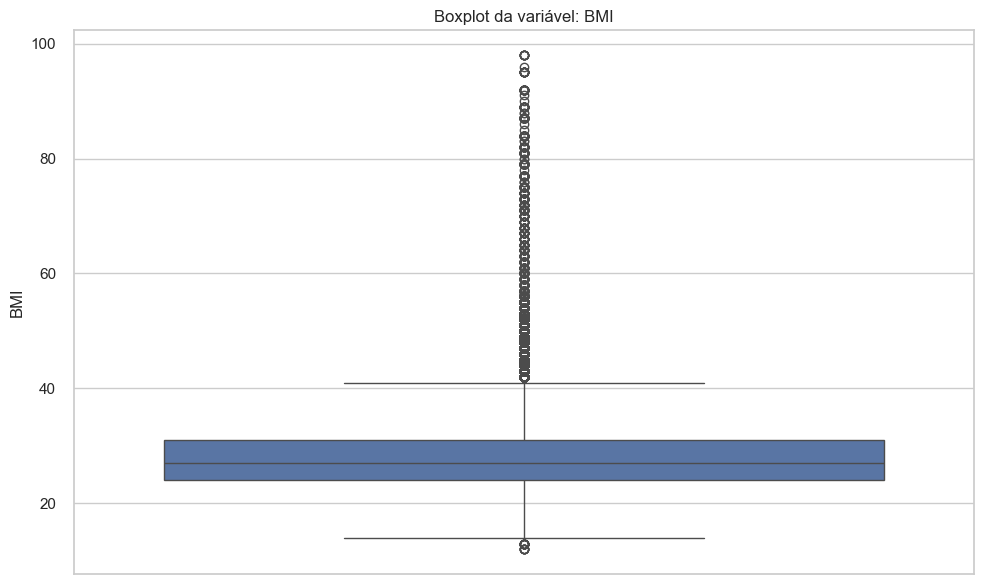

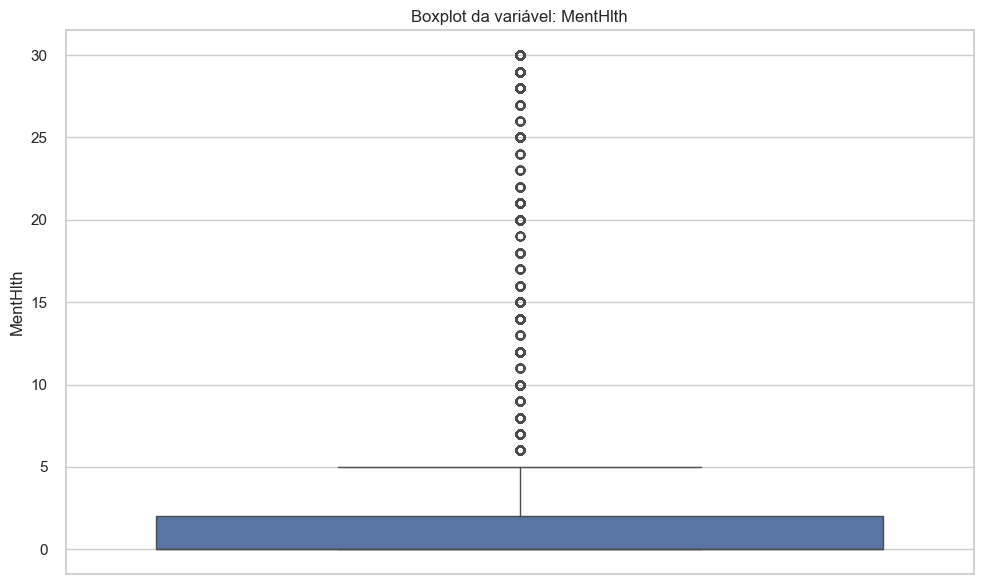

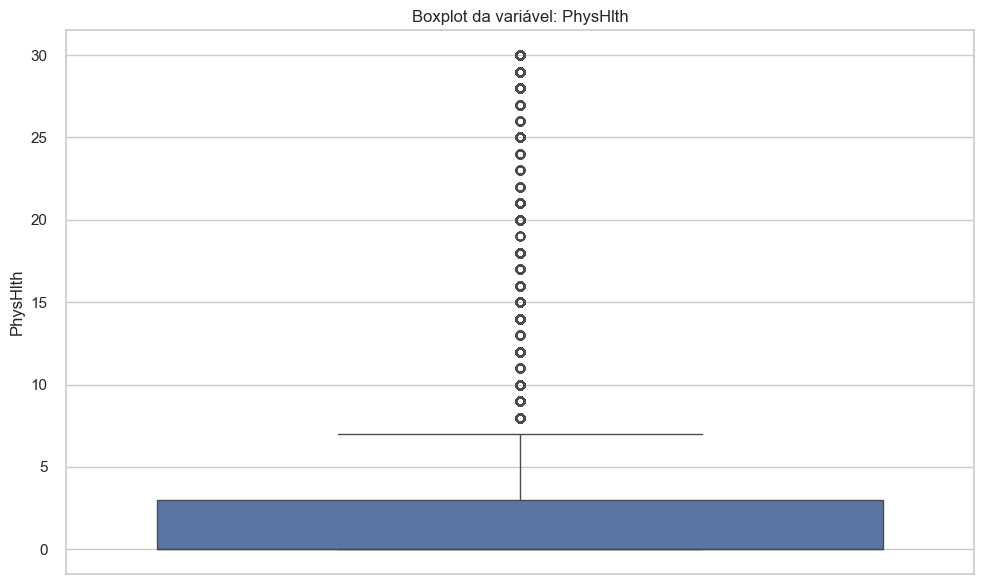

In [22]:
# Verificação de outliers com boxplot
sns.set(style="whitegrid")

variaveis_continuas = ['BMI', 'MentHlth', 'PhysHlth']

for variavel in variaveis_continuas:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df[variavel])
    plt.title(f'Boxplot da variável: {variavel}')
    plt.tight_layout()
    plt.savefig(f'outputs/boxplot_{variavel}.png')
    plt.show()

De acordo com o boxplot de BMI (Índice de Massa Corporal - IMC), podemos ter outliers em nossa análise. No entanto, não podemos confiar apenas no gráfico sem antes examinar mais de perto esses dados atípicos.

Primeiro, é necessário entender a tabela de classificação do Índice de Massa Corporal (IMC), que está representada como BMI na base de dados:

| Faixa de IMC        | Classificação              |
|---------------------|----------------------------|
| Menor que 18,5      | Abaixo do peso             |
| 18,5 - 24,9         | Peso normal                |
| 25 - 29,9           | Sobrepeso                  |
| 30 - 34,9           | Obesidade Grau I           |
| 35 - 39,9           | Obesidade Grau II          |
| Acima de 40         | Obesidade Grau III (Mórbida)|

Primeiro vamos averiguar quais o valores que mais se repetem:

In [23]:
df.BMI.value_counts()

BMI
27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: count, Length: 84, dtype: int64

In [24]:
print(f'Podemos ver que os IMCs de 26 e 27 são os valores que mais se repetem, somando {24606+20562} registros, represetando {(24606+20562)/df.shape[0]*100:.2f}% da base.')

Podemos ver que os IMCs de 26 e 27 são os valores que mais se repetem, somando 45168 registros, represetando 17.81% da base.


In [25]:
df.BMI.describe()

count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64

Um fato curioso é que o gráfico apontou outliers superiores a IMC 40, sendo que o valor máximo da base é 98. Após comparação com a tabela de classificação do IMC, notamos que pacientes com essa pontuação estão classificados como obesidade Grau III (mórbida). Como esses valores são extremamente altos, vamos verificar se há mais de um registro com essa pontuação, o que poderia indicar um erro de digitação, ou se há casos semelhantes. Na próxima função, vou imprimir as 10 pontuações mais altas.

In [26]:
df['BMI'].nlargest(10)

76370    98.0
76394    98.0
76396    98.0
76532    98.0
79478    98.0
79507    98.0
79554    98.0
36324    96.0
76353    95.0
76366    95.0
Name: BMI, dtype: float64

In [27]:
obesidade_extrema = df[df['BMI'] > 40]
obesidade_extrema.shape

(11479, 43)

In [28]:
print(F'Nota-se que, apesar dos valores de IMC serem muito altos, há mais de {obesidade_extrema.shape[0]} casos com esses registros.')

Nota-se que, apesar dos valores de IMC serem muito altos, há mais de 11479 casos com esses registros.


Ápos realizar pesquisas, é possível encontrar casos extremos de pessoas com IMCs elevados, como [Jon Brower Minnoch](https://en.wikipedia.org/wiki/List_of_heaviest_people). Portanto, não podemos considerar esses casos como erros e removê-los da nossa base de dados. Vamos analisar mais de perto esses registros."

In [29]:
obesidade_extrema_sem_diabetes = df[(df['BMI'] > 40) & (df['Diabetes_binary'] == 0)]
print(f'Linhas: {obesidade_extrema_sem_diabetes.shape[0]}; Colunas: {obesidade_extrema_sem_diabetes.shape[1]}')
obesidade_extrema_sem_diabetes.head()

Linhas: 7596; Colunas: 43


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Education_High school graduate,Education_Never attended school/kindergarten,Education_Some high school,Income_15-20k,Income_20-25k,Income_25-35k,Income_35-50k,Income_50-75k,Income_<10k,Income_>75k
97,0.0,1.0,0.0,1.0,45.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
188,0.0,1.0,0.0,1.0,43.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203,0.0,1.0,1.0,1.0,49.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
216,0.0,1.0,0.0,1.0,42.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
270,0.0,0.0,0.0,1.0,41.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
obesidade_extrema_com_diabetes = df[(df['BMI'] > 40) & (df['Diabetes_binary'] == 1)]
print(f'Linhas: {obesidade_extrema_com_diabetes.shape[0]}; Colunas: {obesidade_extrema_com_diabetes.shape[1]}')
obesidade_extrema_com_diabetes.head()

Linhas: 3883; Colunas: 43


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Education_High school graduate,Education_Never attended school/kindergarten,Education_Some high school,Income_15-20k,Income_20-25k,Income_25-35k,Income_35-50k,Income_50-75k,Income_<10k,Income_>75k
85,1.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
156,1.0,1.0,1.0,1.0,47.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
201,1.0,1.0,1.0,1.0,55.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
321,1.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
332,1.0,0.0,0.0,1.0,43.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
print(f'Dos {obesidade_extrema.shape[0]} pacientes com obesidade mórbida, cerca de {obesidade_extrema_com_diabetes.shape[0]} possuem diabetes, o que equivale à {obesidade_extrema_com_diabetes.shape[0]/obesidade_extrema.shape[0]*100:.2f}% da base.')

Dos 11479 pacientes com obesidade mórbida, cerca de 3883 possuem diabetes, o que equivale à 33.83% da base.


De acordo com o [Intramural Research Program (IRP)](https://irp.nih.gov/blog/post/2020/01/extreme-obesity-shaves-years-off-life-expectancy), que pessoas com IMC de 55 a 59, perdem em média 13,7 anos de vida.

Diante disso, não iremos alterar a coluna BMI (Índice de Massa Corporal - IMC), pois acreditamos que esses sejam dados reais.

### Normalização das variaveis preditoras

Antes de rodar o modelo, vamos normalizar os dados, uma técnica que ajusta todas as variáveis para ficarem entre 0 e 1. Isso garante que variáveis com diferentes escalas não influenciem desproporcionalmente o desempenho do modelo, proporcionando uma base equilibrada para o aprendizado.

In [32]:
df_normalizado = df.drop(['Diabetes_binary'], axis=1)
scaler = MinMaxScaler()
df_normalizado = pd.DataFrame(scaler.fit_transform(df_normalizado), columns=df_normalizado.columns)
df_normalizado.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,Education_High school graduate,Education_Never attended school/kindergarten,Education_Some high school,Income_15-20k,Income_20-25k,Income_25-35k,Income_35-50k,Income_50-75k,Income_<10k,Income_>75k
0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df_normalizado.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,Education_High school graduate,Education_Never attended school/kindergarten,Education_Some high school,Income_15-20k,Income_20-25k,Income_25-35k,Income_35-50k,Income_50-75k,Income_<10k,Income_>75k
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,0.190493,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.275583,0.000686,0.247359,0.063048,0.079372,0.102030,0.143764,0.170368,0.038675,0.356295
std,0.494934,0.494210,0.189571,0.076845,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.446809,0.026181,0.431478,0.243050,0.270318,0.302689,0.350851,0.375957,0.192819,0.478905
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.139535,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.174419,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.220930,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Balanceamento da variável resposta

In [34]:
print(f'Precisamos balancear nossa variavel resposta, pois atualmente temos {df.Diabetes_binary.value_counts()[1]} em um total de {df.shape[0]} registros, o que representa apenas {df.Diabetes_binary.value_counts()[1]/df.shape[0]*100:.2f}% dos dados. Essa distribuição desbalanceada pode gerar um viés no modelo, fazendo com que ele aprenda muito mais sobre os perfis de não-diabéticos e pouco sobre os diabéticos. Além disso, isso pode resultar em um overfitting, onde o modelo se torna tendencioso, prejudicando sua capacidade de generalizar corretamente em novos dados.')

Precisamos balancear nossa variavel resposta, pois atualmente temos 35346 em um total de 253680 registros, o que representa apenas 13.93% dos dados. Essa distribuição desbalanceada pode gerar um viés no modelo, fazendo com que ele aprenda muito mais sobre os perfis de não-diabéticos e pouco sobre os diabéticos. Além disso, isso pode resultar em um overfitting, onde o modelo se torna tendencioso, prejudicando sua capacidade de generalizar corretamente em novos dados.


In [35]:
df_normalizado['Diabetes_binary'] = df.Diabetes_binary
df_normalizado

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,Education_Never attended school/kindergarten,Education_Some high school,Income_15-20k,Income_20-25k,Income_25-35k,Income_35-50k,Income_50-75k,Income_<10k,Income_>75k,Diabetes_binary
0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,0.383721,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
253676,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
253677,0.0,0.0,1.0,0.186047,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
253678,1.0,0.0,1.0,0.127907,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [36]:
%%time
X = df_normalizado.drop('Diabetes_binary', axis=1)
y = df_normalizado['Diabetes_binary']
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

CPU times: total: 5.25 s
Wall time: 4.71 s


In [37]:
print('Agora a variável reposta Diabetes_binary ficou distribuida igualmente: ')
print(y_res.value_counts())

Agora a variável reposta Diabetes_binary ficou distribuida igualmente: 
Diabetes_binary
0.0    218334
1.0    218334
Name: count, dtype: int64


In [38]:
df_final = pd.concat([pd.DataFrame(X_res, columns=X.columns), pd.DataFrame(y_res, columns=['Diabetes_binary'])], axis=1)
print('O DataFrame final, com as variáveis normalizadas e balanceadas, ficou da seguinte maneira:')
print(f'Linhas: {df_final.shape[0]}; Colunas: {df_final.shape[1]}')
df_final.head()

O DataFrame final, com as variáveis normalizadas e balanceadas, ficou da seguinte maneira:
Linhas: 436668; Colunas: 43


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,Education_Never attended school/kindergarten,Education_Some high school,Income_15-20k,Income_20-25k,Income_25-35k,Income_35-50k,Income_50-75k,Income_<10k,Income_>75k,Diabetes_binary
0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Desenvolvimento do modelo


Agora que temos o dataframe final, iremos separar 95% dos dados para a fase de modelagem, que inclui treino e teste. Os 5% restantes serão utilizados posteriormente para a validação do modelo.

In [39]:
data = df_final.sample(frac=0.95, random_state=786)
data_unseen = df_final.drop(data.index)

data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

print('Conjunto de dados 95% para modelagem (treino e teste): ' + str(data.shape))
print('Conjunto de dados 5% não usados no treino/teste, apenas como validação: ' + str(data_unseen.shape))

Conjunto de dados 95% para modelagem (treino e teste): (414835, 43)
Conjunto de dados 5% não usados no treino/teste, apenas como validação: (21833, 43)


Para a escolha do melhor modelo de classificação iremos utilizar a biblioteca Pycaret, que irá testar diferentes modelos para escolher qual se ajusta melhor com a base.

In [40]:
%%time
# Configurar o ambiente PyCaret
clf = setup(data=data, target='Diabetes_binary',
           train_size=0.8, fold=5, session_id=123)

,Description,Value
0,Session id,123
1,Target,Diabetes_binary
2,Target type,Binary
3,Original data shape,"(414835, 43)"
4,Transformed data shape,"(414835, 43)"
5,Transformed train set shape,"(331868, 43)"
6,Transformed test set shape,"(82967, 43)"
7,Numeric features,42
8,Preprocess,True
9,Imputation type,simple


CPU times: total: 1.09 s
Wall time: 5.01 s


In [41]:
%%time
best_model = compare_models(fold=4, sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9161,0.9700,0.8684,0.9599,0.9119,0.8322,0.8360,2.4375
et,Extra Trees Classifier,0.9154,0.9684,0.9275,0.9056,0.9164,0.8309,0.8311,29.7150
rf,Random Forest Classifier,0.9115,0.9707,0.8975,0.9233,0.9102,0.8230,0.8233,19.4850
dt,Decision Tree Classifier,0.8738,0.8744,0.8799,0.8693,0.8745,0.7476,0.7477,2.6375
gbc,Gradient Boosting Classifier,0.8680,0.9463,0.8665,0.8690,0.8677,0.7359,0.7359,24.6500
ada,Ada Boost Classifier,0.8270,0.9152,0.8527,0.8110,0.8313,0.6541,0.6550,6.2975
knn,K Neighbors Classifier,0.8154,0.8889,0.9040,0.7679,0.8304,0.6308,0.6410,92.3275
lr,Logistic Regression,0.7574,0.8328,0.7877,0.7426,0.7645,0.5148,0.5158,4.0650
lda,Linear Discriminant Analysis,0.7559,0.8315,0.7970,0.7363,0.7655,0.5118,0.5135,1.0375
ridge,Ridge Classifier,0.7558,0.8314,0.7969,0.7363,0.7654,0.5117,0.5134,0.5800


CPU times: total: 20.5 s
Wall time: 12min 40s


De acordo com o PyCaret, o melhor modelo para essa base de dados é o Light Gradient Boosting Machine (LightGBM), caracterizado pelos seguintes pontos:

- Melhor Acurácia, com 91.61%.
- Melhor Precisão, com 0.9599.
- Melhor Kappa, concordância entre as previsões do modelo e as classificações corretas, com 0.8322.
- Melhor MCC (Matthews Correlation Coefficient), que mede a robustez da classificação, com um valor de 0.8360.

Poderíamos continuar utilizando o PyCaret para automatizar os próximos passos do processo, mas, para fins didáticos, optaremos pelo caminho manual.

In [42]:
# Separando a variável alvo e as variáveis preditoras
X = df_final.drop('Diabetes_binary', axis=1)
y = df_final['Diabetes_binary']

In [43]:
# Dividindo 95% dos dados para treino/teste e 5% para validação
X_train_test, X_val, y_train_test, y_val = train_test_split(X, y, test_size=0.05, random_state=42, stratify=y)

In [44]:
# Dividindo 70% para treino e 30% para teste dentro dos 95%
X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size=0.3, random_state=42, stratify=y_train_test)

In [45]:
%%time
# Configurando o modelo LightGBM e RandomizedSearchCV
model = lgb.LGBMClassifier(boosting_type='gbdt', random_state=123, verbose=-1, n_jobs=-1)
parametros = {
    'num_leaves': [50, 70, 90],          
    'learning_rate': [0.01, 0.05, 0.1],  
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [-10, -1, 10, 20],           
    'min_child_samples': [20, 40, 60],   
    'min_split_gain': [0.5, 0.7, 0.9],   
    'reg_alpha': [0, 2, 4],              
    'reg_lambda': [1, 3, 5],             
    'subsample': [0.6, 0.8, 1.0],        
    'colsample_bytree': [0.6, 0.8, 1.0], 
    'feature_fraction': [0.4, 0.6, 0.8], 
    'bagging_fraction': [0.6, 0.8, 1.0], 
    'bagging_freq': [1, 2, 5] 
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=parametros, 
                                   n_iter=20, cv=3, scoring='accuracy', verbose=1, random_state=42)
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
warnings.filterwarnings('default')

Fitting 3 folds for each of 20 candidates, totalling 60 fits
CPU times: total: 32min 25s
Wall time: 5min 48s


In [46]:
# Melhores paramtros encontrados para o modelo
best_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_samples': 40,
 'min_child_weight': 0.001,
 'min_split_gain': 0.5,
 'n_estimators': 300,
 'n_jobs': -1,
 'num_leaves': 90,
 'objective': None,
 'random_state': 123,
 'reg_alpha': 2,
 'reg_lambda': 1,
 'subsample': 0.8,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'verbose': -1,
 'feature_fraction': 0.8,
 'bagging_freq': 2,
 'bagging_fraction': 0.8}

In [47]:
%%time
# Mostrar os resultados de diferentes métricas do modelo nas bases de treino, teste e validação
def get_metrics_report(y_true, y_pred, dataset_type):
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    accuracy = accuracy_score(y_true, y_pred)
    df_report['Acurácia'] = accuracy
    df_report['Dataset'] = dataset_type  # Identificador (Treino, Teste, Validação)
    return df_report

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
y_val_pred = best_model.predict(X_val)

df_train = get_metrics_report(y_train, y_train_pred, 'Treino')
df_test = get_metrics_report(y_test, y_test_pred, 'Teste')
df_val = get_metrics_report(y_val, y_val_pred, 'Validação')

df_results = pd.concat([df_train, df_test, df_val])
df_results = df_results[['precision', 'recall', 'f1-score', 'Acurácia', 'support', 'Dataset']]

df_results

CPU times: total: 17 s
Wall time: 4.18 s


,precision,recall,f1-score,Acurácia,support,Dataset
0.0,0.883305,0.980736,0.929474,0.925584,145191.000000,Treino
1.0,0.978348,0.870434,0.921241,0.925584,145192.000000,Treino
accuracy,0.925584,0.925584,0.925584,0.925584,0.925584,Treino
macro avg,0.930826,0.925585,0.925357,0.925584,290383.000000,Treino
weighted avg,0.930826,0.925584,0.925357,0.925584,290383.000000,Treino
0.0,0.879863,0.974769,0.924888,0.920836,62226.000000,Teste
1.0,0.971718,0.866902,0.916323,0.920836,62225.000000,Teste
accuracy,0.920836,0.920836,0.920836,0.920836,0.920836,Teste
macro avg,0.925791,0.920836,0.920605,0.920836,124451.000000,Teste
weighted avg,0.925790,0.920836,0.920605,0.920836,124451.000000,Teste


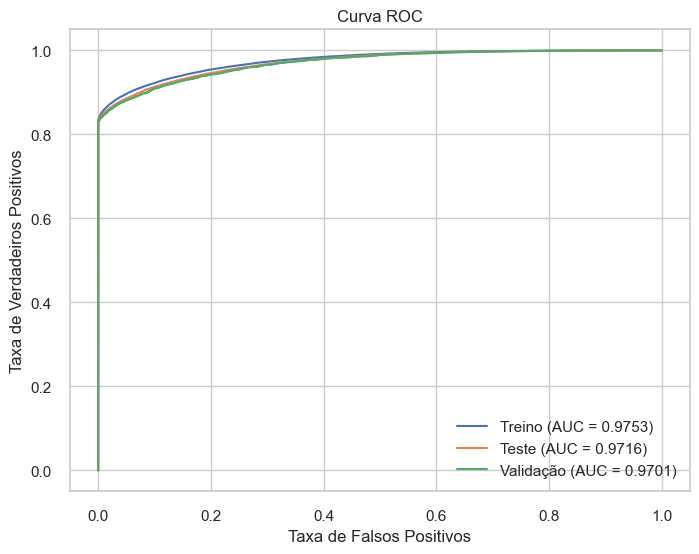

In [48]:
# Função para plotar a Curva ROC
def plot_roc_curve(y_true, y_proba, dataset_type):
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    auc_score = roc_auc_score(y_true, y_proba)
    
    plt.plot(fpr, tpr, label=f'{dataset_type} (AUC = {auc_score:.4f})')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')

plt.figure(figsize=(8, 6))
y_train_proba = best_model.predict_proba(X_train)[:, 1]
y_test_proba = best_model.predict_proba(X_test)[:, 1]
y_val_proba = best_model.predict_proba(X_val)[:, 1]

plot_roc_curve(y_train, y_train_proba, 'Treino')
plot_roc_curve(y_test, y_test_proba, 'Teste')
plot_roc_curve(y_val, y_val_proba, 'Validação')

plt.savefig(f'outputs/curva_roc.png')
plt.show()


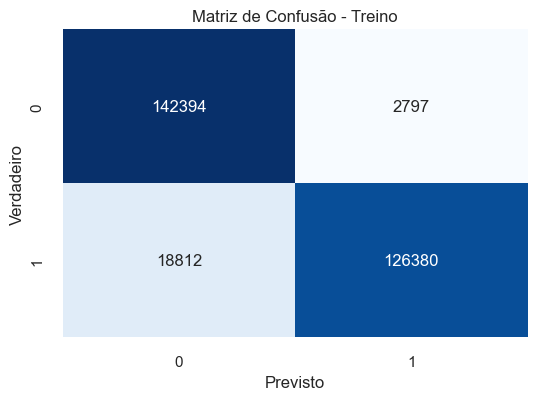

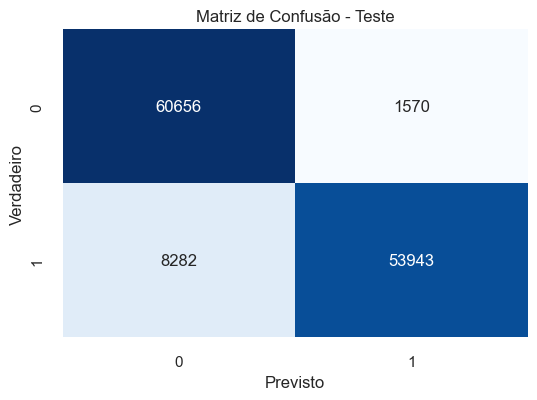

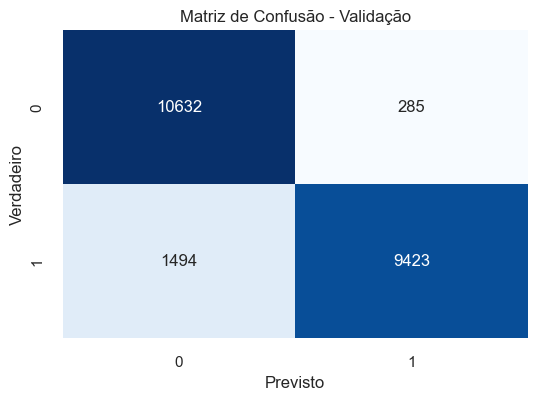

In [49]:
# Plotar a Matriz de Confusão
def plot_confusion_matrix(y_true, y_pred, dataset_type):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matriz de Confusão - {dataset_type}')
    plt.ylabel('Verdadeiro')
    plt.xlabel('Previsto')
    plt.savefig(f'outputs/matrix_confusion.png')
    plt.show()

plot_confusion_matrix(y_train, y_train_pred, 'Treino')
plot_confusion_matrix(y_test, y_test_pred, 'Teste')
plot_confusion_matrix(y_val, y_val_pred, 'Validação')

## Avaliação

O modelo está generalizando bem, com valores consistentes de AUC, precisão, recall e F1-score em todos os conjuntos de treino, teste e validação.
- **Curva ROC e AUC(Área Sob a Curva):**
  - AUC para Treino: 0.9753
  - AUC Teste: 0.9716
  - AUC para Validação: 0.9701
- **Matriz de Confusão:**
  - Nos conjuntos de treino, teste e validação o modelo fez aproximadamente 93% previsões corretas das classes 0 e 1, com uma taxa relativamente pequena de falsos positivos e falsos negativos de 7%. As taxas de erro são consistentes entre os três conjuntos, o que é um ótimo indicador da estabilidade do modelo.
- **Precision, Recall, F1-Score:**
    -  As métricas são bastante consistentes entre treino, teste e validação, com altos valores de precisão e recall para as classes 0 e 1. Isso mostra que o modelo está acertando bastante nas previsões.

## Deploy

Para realizar o deploy do modelo, criaremos um pipeline com o modelo LGBM ajustado. Esse pipeline simplificará o processo de deploy, encapsulando o modelo e permitindo sua aplicação direta em novos dados

In [50]:
# Criando Pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', lgb.LGBMClassifier(
        boosting_type='gbdt',
        class_weight=None,
        colsample_bytree=1.0,
        importance_type='split',
        learning_rate=0.1,
        max_depth=10,
        min_child_samples=40,
        min_child_weight=0.001,
        min_split_gain=0.5,
        n_estimators=300,
        n_jobs=-1,    
        num_leaves=90,
        objective=None,
        random_state=123,
        reg_alpha=2,
        reg_lambda=1,
        subsample=0.8,
        subsample_for_bin=200000,
        subsample_freq=0,
        verbose=-1, 
        feature_fraction=0.8,
        bagging_freq=2,
        bagging_fraction=0.8,
    ))
])

pipeline.fit(X_train, y_train)
joblib.dump(pipeline, 'model.pkl')

['model.pkl']

Link para acessar o deploy da aplicação do modelo: https://ebac-data-science-proejto-final.streamlit.app